## Data Augmentation

In [1]:
base_path = "/Volumes/Shawn_HDD/PhD/Project/Date/augmentation_from_matlab/Cropped/based_on_truth/x100100y100100z8080"
volumes_path = base_path + "/volumes"
points_path = base_path + "/points"
length_path = base_path + "/length"


In [31]:
import numpy as np
import Functions.MyDataset as MyDataset

pat_name = "MJ"
pat_volume_left = np.load(f"{volumes_path}/{pat_name}_augVolume_1_cropped_left.npy")
pat_volume_right = np.load(f"{volumes_path}/{pat_name}_augVolume_1_cropped_right.npy")
pat_point_left = np.load(f"{points_path}/{pat_name}_augPoints_1_cropped_left.npy")
pat_point_right = np.load(f"{points_path}/{pat_name}_augPoints_1_cropped_right.npy")
pat_length_left = np.load(f"{length_path}/{pat_name}_augLength_1_cropped_left.npy")
pat_length_right = np.load(f"{length_path}/{pat_name}_augLength_1_cropped_right.npy")

In [3]:
## load all patients' landmarks to calculate the mean angle
import Functions.MyDataset as MyDataset

pat_names = MyDataset.get_pat_names()

pat_points = []
for pt_name in pat_names:
    pat_point_left = np.load(f"{points_path}/{pt_name}_augPoints_1_cropped_left.npy").reshape((1, 2, 3))
    pat_point_right = np.load(f"{points_path}/{pt_name}_augPoints_1_cropped_right.npy").reshape((1, 2, 3))
    if len(pat_points) == 0:
        pat_points = pat_point_left
        pat_points = np.concatenate((pat_points, pat_point_right), axis=0)
    else:
        pat_points = np.concatenate((pat_points, pat_point_left), axis=0)
        pat_points = np.concatenate((pat_points, pat_point_right), axis=0)

In [32]:
# point_left_diff = np.asarray([[0, 0, 0], [0, 0, 0]])
# point_right_diff = np.asarray([[0, 0, 0], [0, 0, 0]])
point_left_diff = np.asarray([[0, 0, 0], [0, 0, 0]])
point_right_diff = np.asarray([[0, 0, 0], [0, 0, 0]])

pat_point_left_new = pat_point_left - point_left_diff
pat_length_left_new = pat_length_left + point_left_diff

point_right_diff[:, 0] = - point_right_diff[:, 0]
pat_point_right_new = pat_point_right - point_right_diff
pat_length_right_new = pat_length_right + point_right_diff

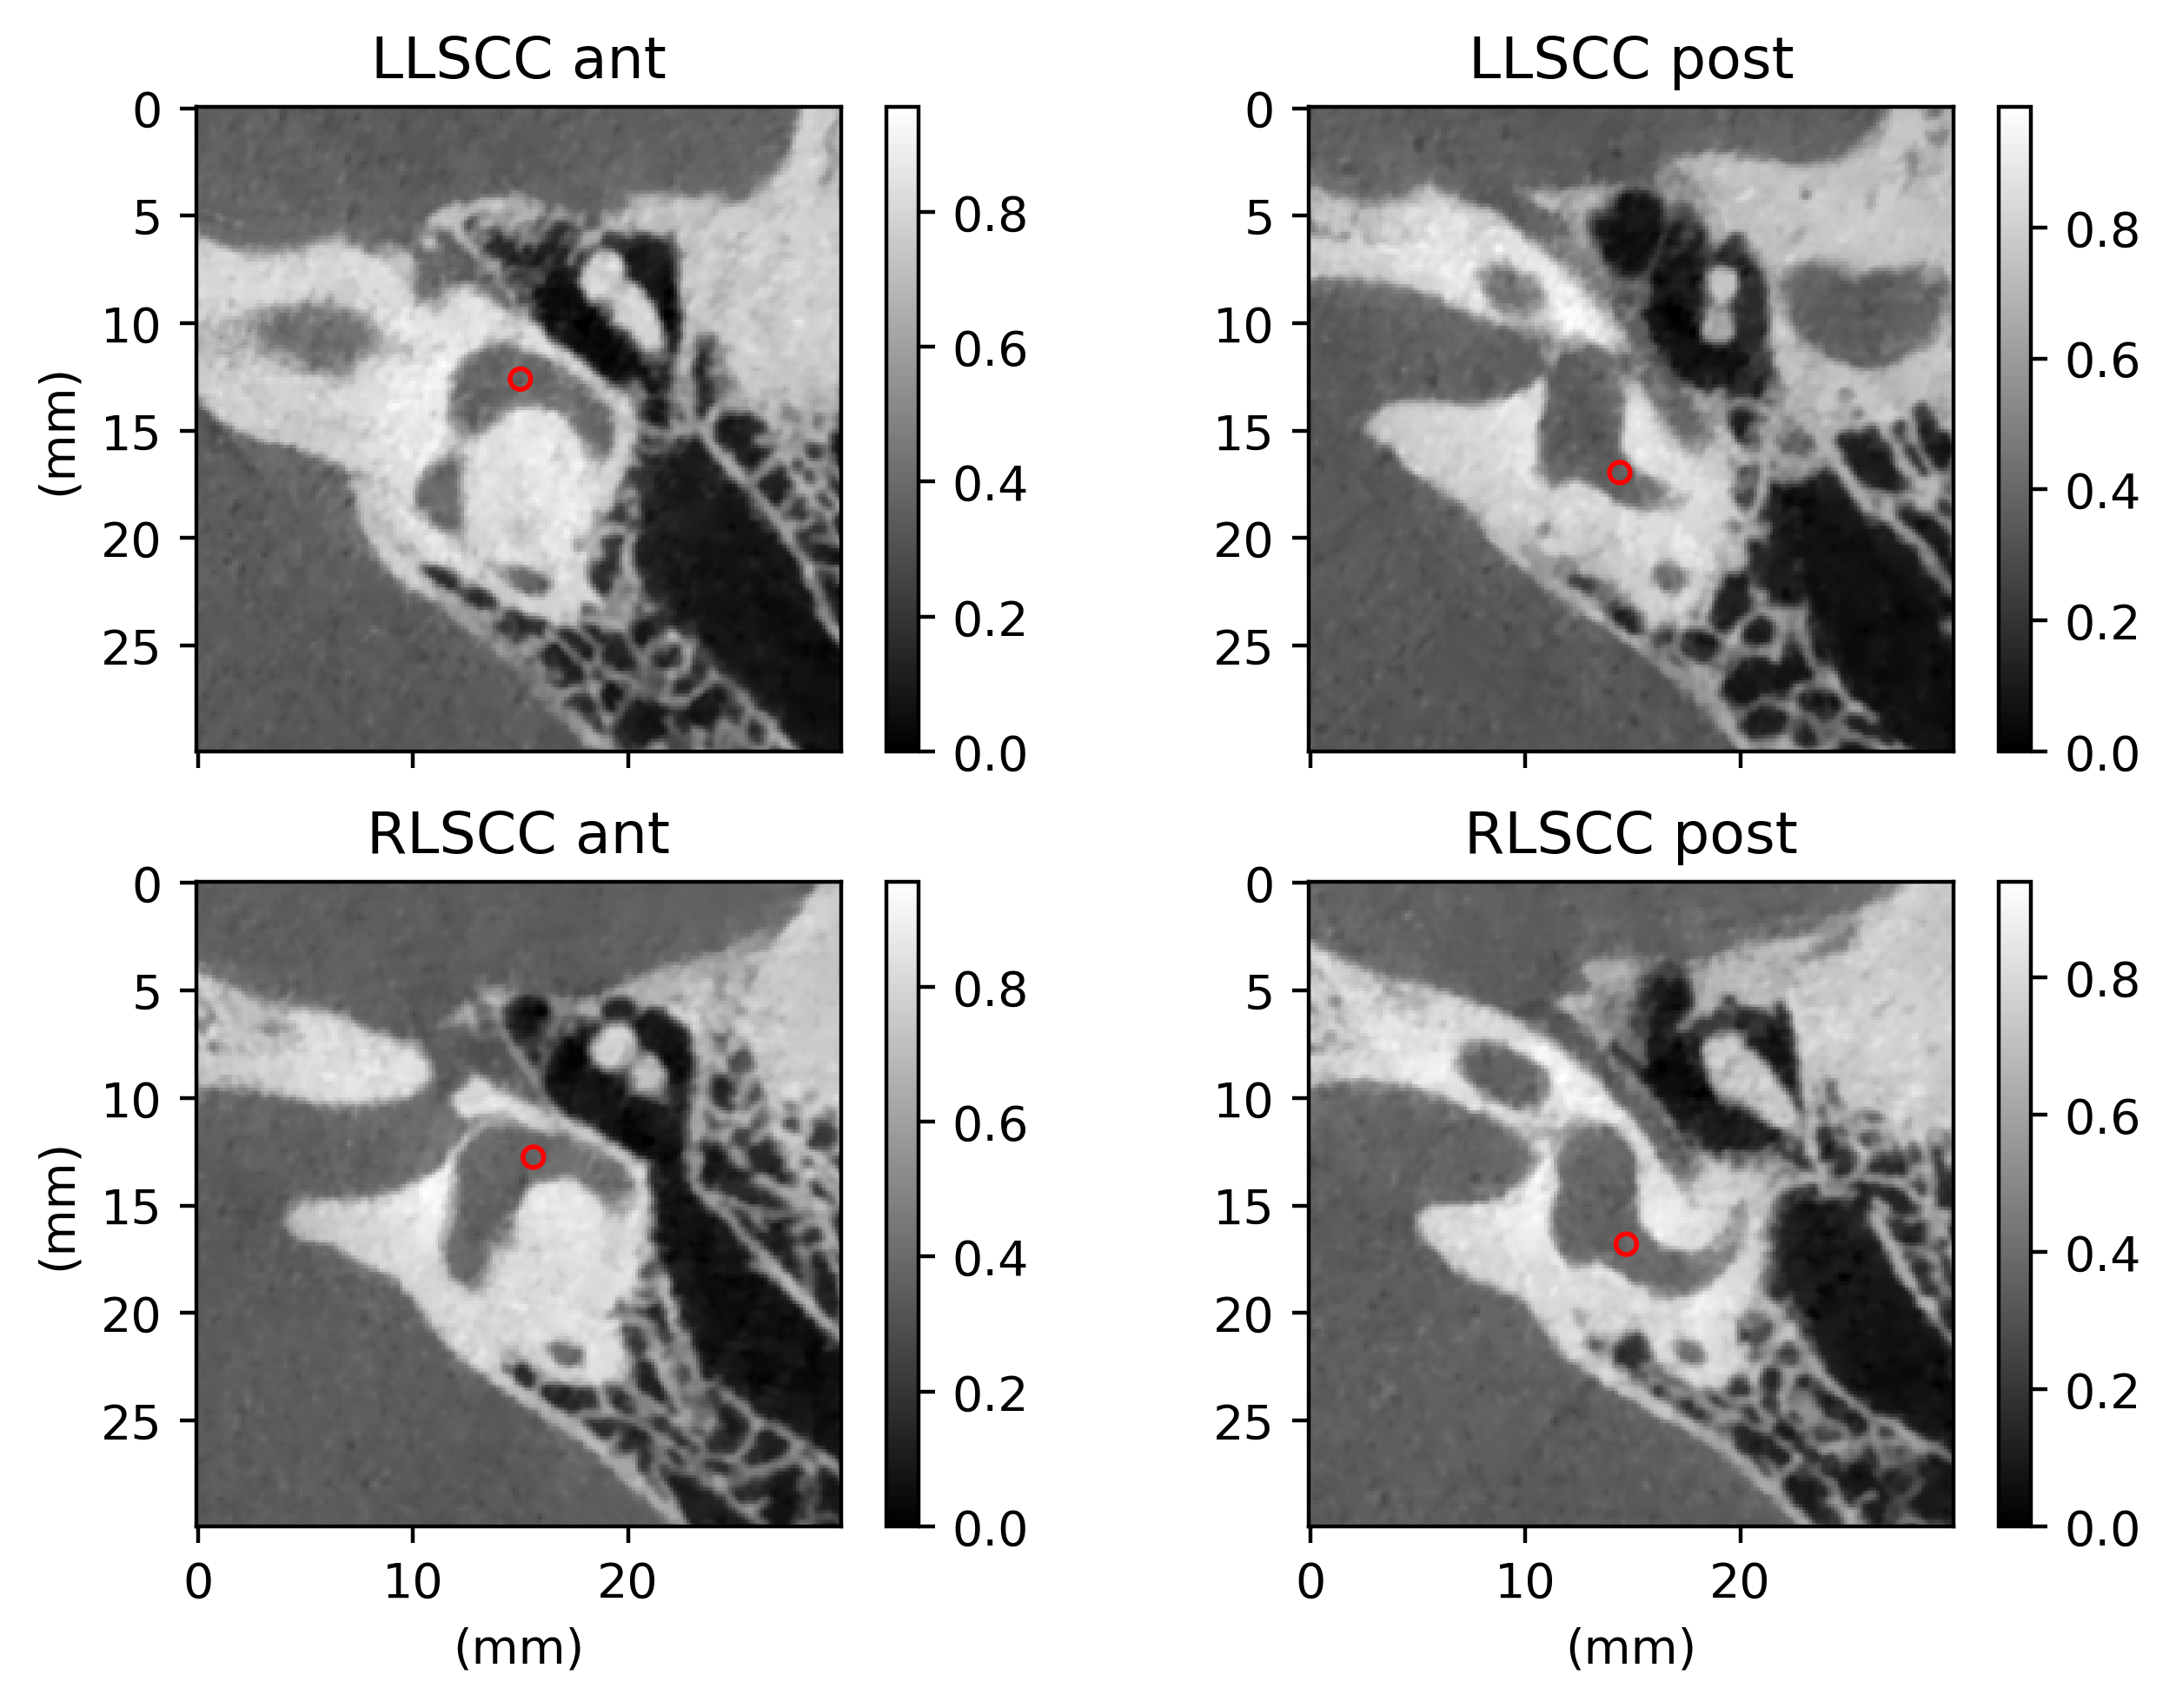

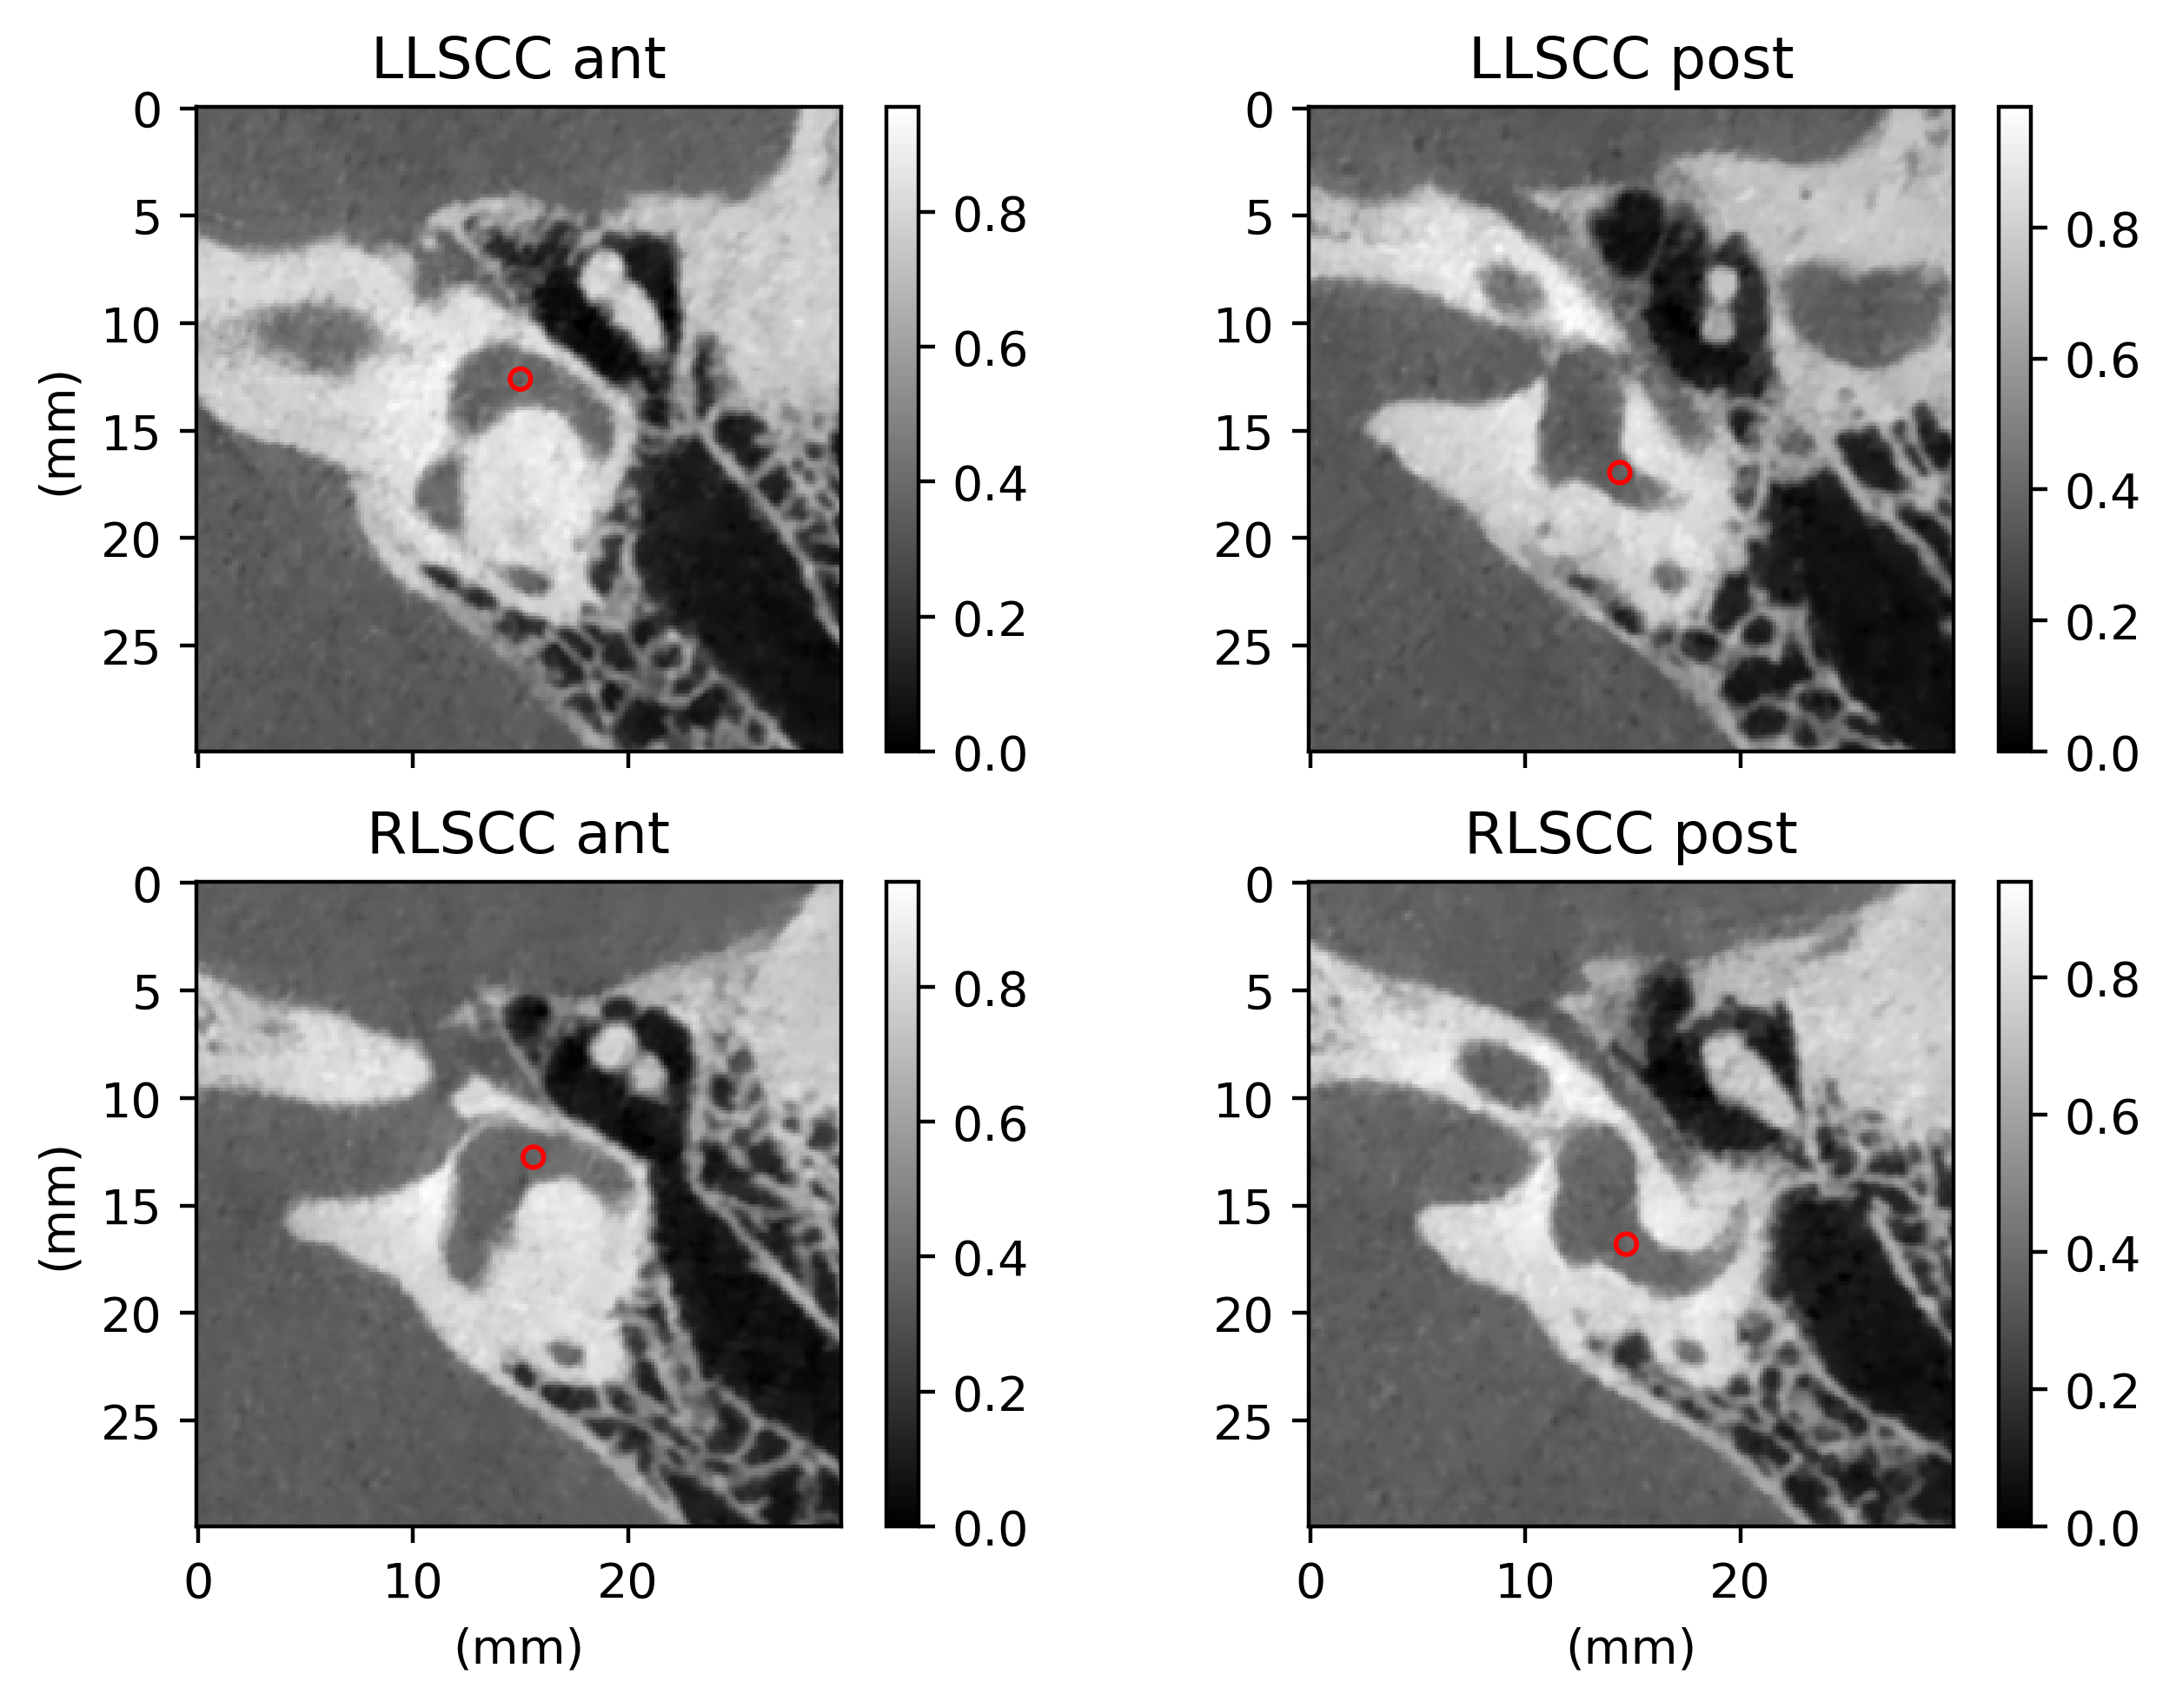

In [33]:
import Functions.Visualization as Visualization

import importlib
importlib.reload(Visualization)

Visualization.show_two_landmarks(pat_volume_left, pat_point_left, pat_volume_right, pat_point_right, [0.15, 0.15, 0.15])

Visualization.show_two_landmarks(pat_volume_left, pat_point_left_new, pat_volume_right, pat_point_right_new, [0.15, 0.15, 0.15])

In [9]:
import math

def angle_3D_points(x1, y1, z1,
                    x2, y2, z2,
                    x3, y3, z3):
    # Find direction ratio of line AB
    ABx = x1 - x2;
    ABy = y1 - y2;
    ABz = z1 - z2;

    # Find direction ratio of line BC
    BCx = x3 - x2;
    BCy = y3 - y2;
    BCz = z3 - z2;
    
    v1_mag = math.sqrt(ABx*ABx + ABy*ABy + ABz*ABz)
    v1_norm = (ABx/v1_mag, ABy/v1_mag, ABz/v1_mag)

    v2_mag = math.sqrt(BCx*BCx + BCy*BCy + BCz*BCz)
    v2_norm = (BCx/v2_mag, BCy/v2_mag, BCz/v2_mag)
    
    dot_products = v1_norm[0] * v2_norm[0] + v1_norm[1] * v2_norm[1] + v1_norm[2] * v2_norm[2]
    
    angle = (math.acos(dot_products) * 180.0) / math.pi
    print(round(angle, 2))
    
    return round(angle, 2)


In [10]:
def cal_angles(pt_points, pt_points_new):
    (Ax1, Ay1, Az1) = pt_points[0]
    (Bx2, By2, Bz2) = np.mean(pt_points, axis=0)
    angle_3D_points(Ax1, Ay1, Az1,
                   Bx2, By2, Bz2,
                   Bx2+1, By2, Bz2)
    angle_3D_points(Ax1, Ay1, Az1,
                   Bx2, By2, Bz2,
                   Bx2, By2+1, Bz2)
    angle_3D_points(Ax1, Ay1, Az1,
                   Bx2, By2, Bz2,
                   Bx2, By2, Bz2+1)

    (Ax1_, Ay1_, Az1_) = pt_points_new[0]
    (Bx2_, By2_, Bz2_) = np.mean(pt_points_new, axis=0)
    angle_3D_points(Ax1_, Ay1_, Az1_,
                   Bx2_, By2_, Bz2_,
                   Bx2_+1, By2_, Bz2_)
    angle_3D_points(Ax1_, Ay1_, Az1_,
                   Bx2_, By2_, Bz2_,
                   Bx2_, By2_+1, Bz2_)
    angle_3D_points(Ax1_, Ay1_, Az1_,
                   Bx2_, By2_, Bz2_,
                   Bx2_, By2_, Bz2_+1)

In [34]:
cal_angles(pat_point_left, pat_point_left_new)

82.83
154.87
66.06
82.83
154.87
66.06


In [12]:
def cal_angles_one(pt_points):
    (Ax1, Ay1, Az1) = pt_points[0]
    (Bx2, By2, Bz2) = np.mean(pt_points, axis=0)
    xr = angle_3D_points(Ax1, Ay1, Az1,
                    Bx2, By2, Bz2,
                    Bx2+1, By2, Bz2)
    yr = angle_3D_points(Ax1, Ay1, Az1,
                    Bx2, By2, Bz2,
                    Bx2, By2+1, Bz2)
    zr = angle_3D_points(Ax1, Ay1, Az1,
                    Bx2, By2, Bz2,
                    Bx2, By2, Bz2+1)
    
    return [xr, yr, zr]

In [13]:
angles = []

for i in range(40):
    angle = cal_angles_one(pat_points[i])
    angles.append(angle)
    
angles = np.asarray(angles)

76.46
165.91
86.16
64.83
152.06
78.68
57.37
130.32
57.37
70.6
144.3
61.33
71.69
140.16
56.05
78.98
142.8
55.0
70.77
140.21
56.71
76.11
145.41
59.04
73.16
154.34
71.22
54.31
141.07
76.5
76.61
157.84
72.68
70.28
155.67
76.34
58.96
140.67
68.39
72.45
154.76
72.45
69.02
141.97
59.92
56.51
136.4
65.56
68.79
149.23
68.79
75.76
152.34
66.82
72.13
152.86
70.27
63.04
140.12
63.04
67.38
147.05
67.38
70.21
144.36
61.7
73.16
154.34
71.22
68.64
151.69
72.33
67.44
155.07
79.96
71.81
153.81
71.81
72.87
156.96
75.07
69.72
152.37
72.05
59.58
144.89
74.18
70.85
152.36
70.85
62.22
146.35
72.56
76.75
156.45
70.89
82.83
154.87
66.06
77.97
159.68
73.87
60.88
147.52
76.87
72.28
155.96
74.3
69.59
144.46
62.29
68.67
136.67
54.41
52.76
135.4
69.14
60.25
131.42
55.78


In [42]:
JM_angle = cal_angles_one(pat_point_left)

82.83
154.87
66.06


In [15]:
mean_angle = np.mean(angles, axis=0)

## find way to rotate and translate

In [35]:
from scipy import ndimage

v_left = np.reshape(pat_volume_left, (200, 200, 160))
p_left = np.copy(pat_point_left.reshape((2,3)))

In [154]:
centre = np.asarray([100, 100, 80]) - 1
org = np.mean(pat_point_left, axis=0) - 1
shift_value = np.ceil(centre - org)

In [155]:
v_left_shift = ndimage.shift(v_left, shift_value)
p_left_shift = p_left + shift_value

In [156]:
print(v_left_shift[:, :, 146])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.33796895 0.34831824 ... 0.33214748 0.33376455 0.33602846]
 [0.         0.34282018 0.35316947 ... 0.33117723 0.33570505 0.33344114]
 ...
 [0.         0.32309185 0.32276843 ... 0.31759379 0.33150065 0.33732212]
 [0.         0.3305304  0.32244502 ... 0.32729625 0.32600259 0.33150065]
 [0.         0.33602846 0.32276843 ... 0.33408797 0.31597671 0.32082794]]


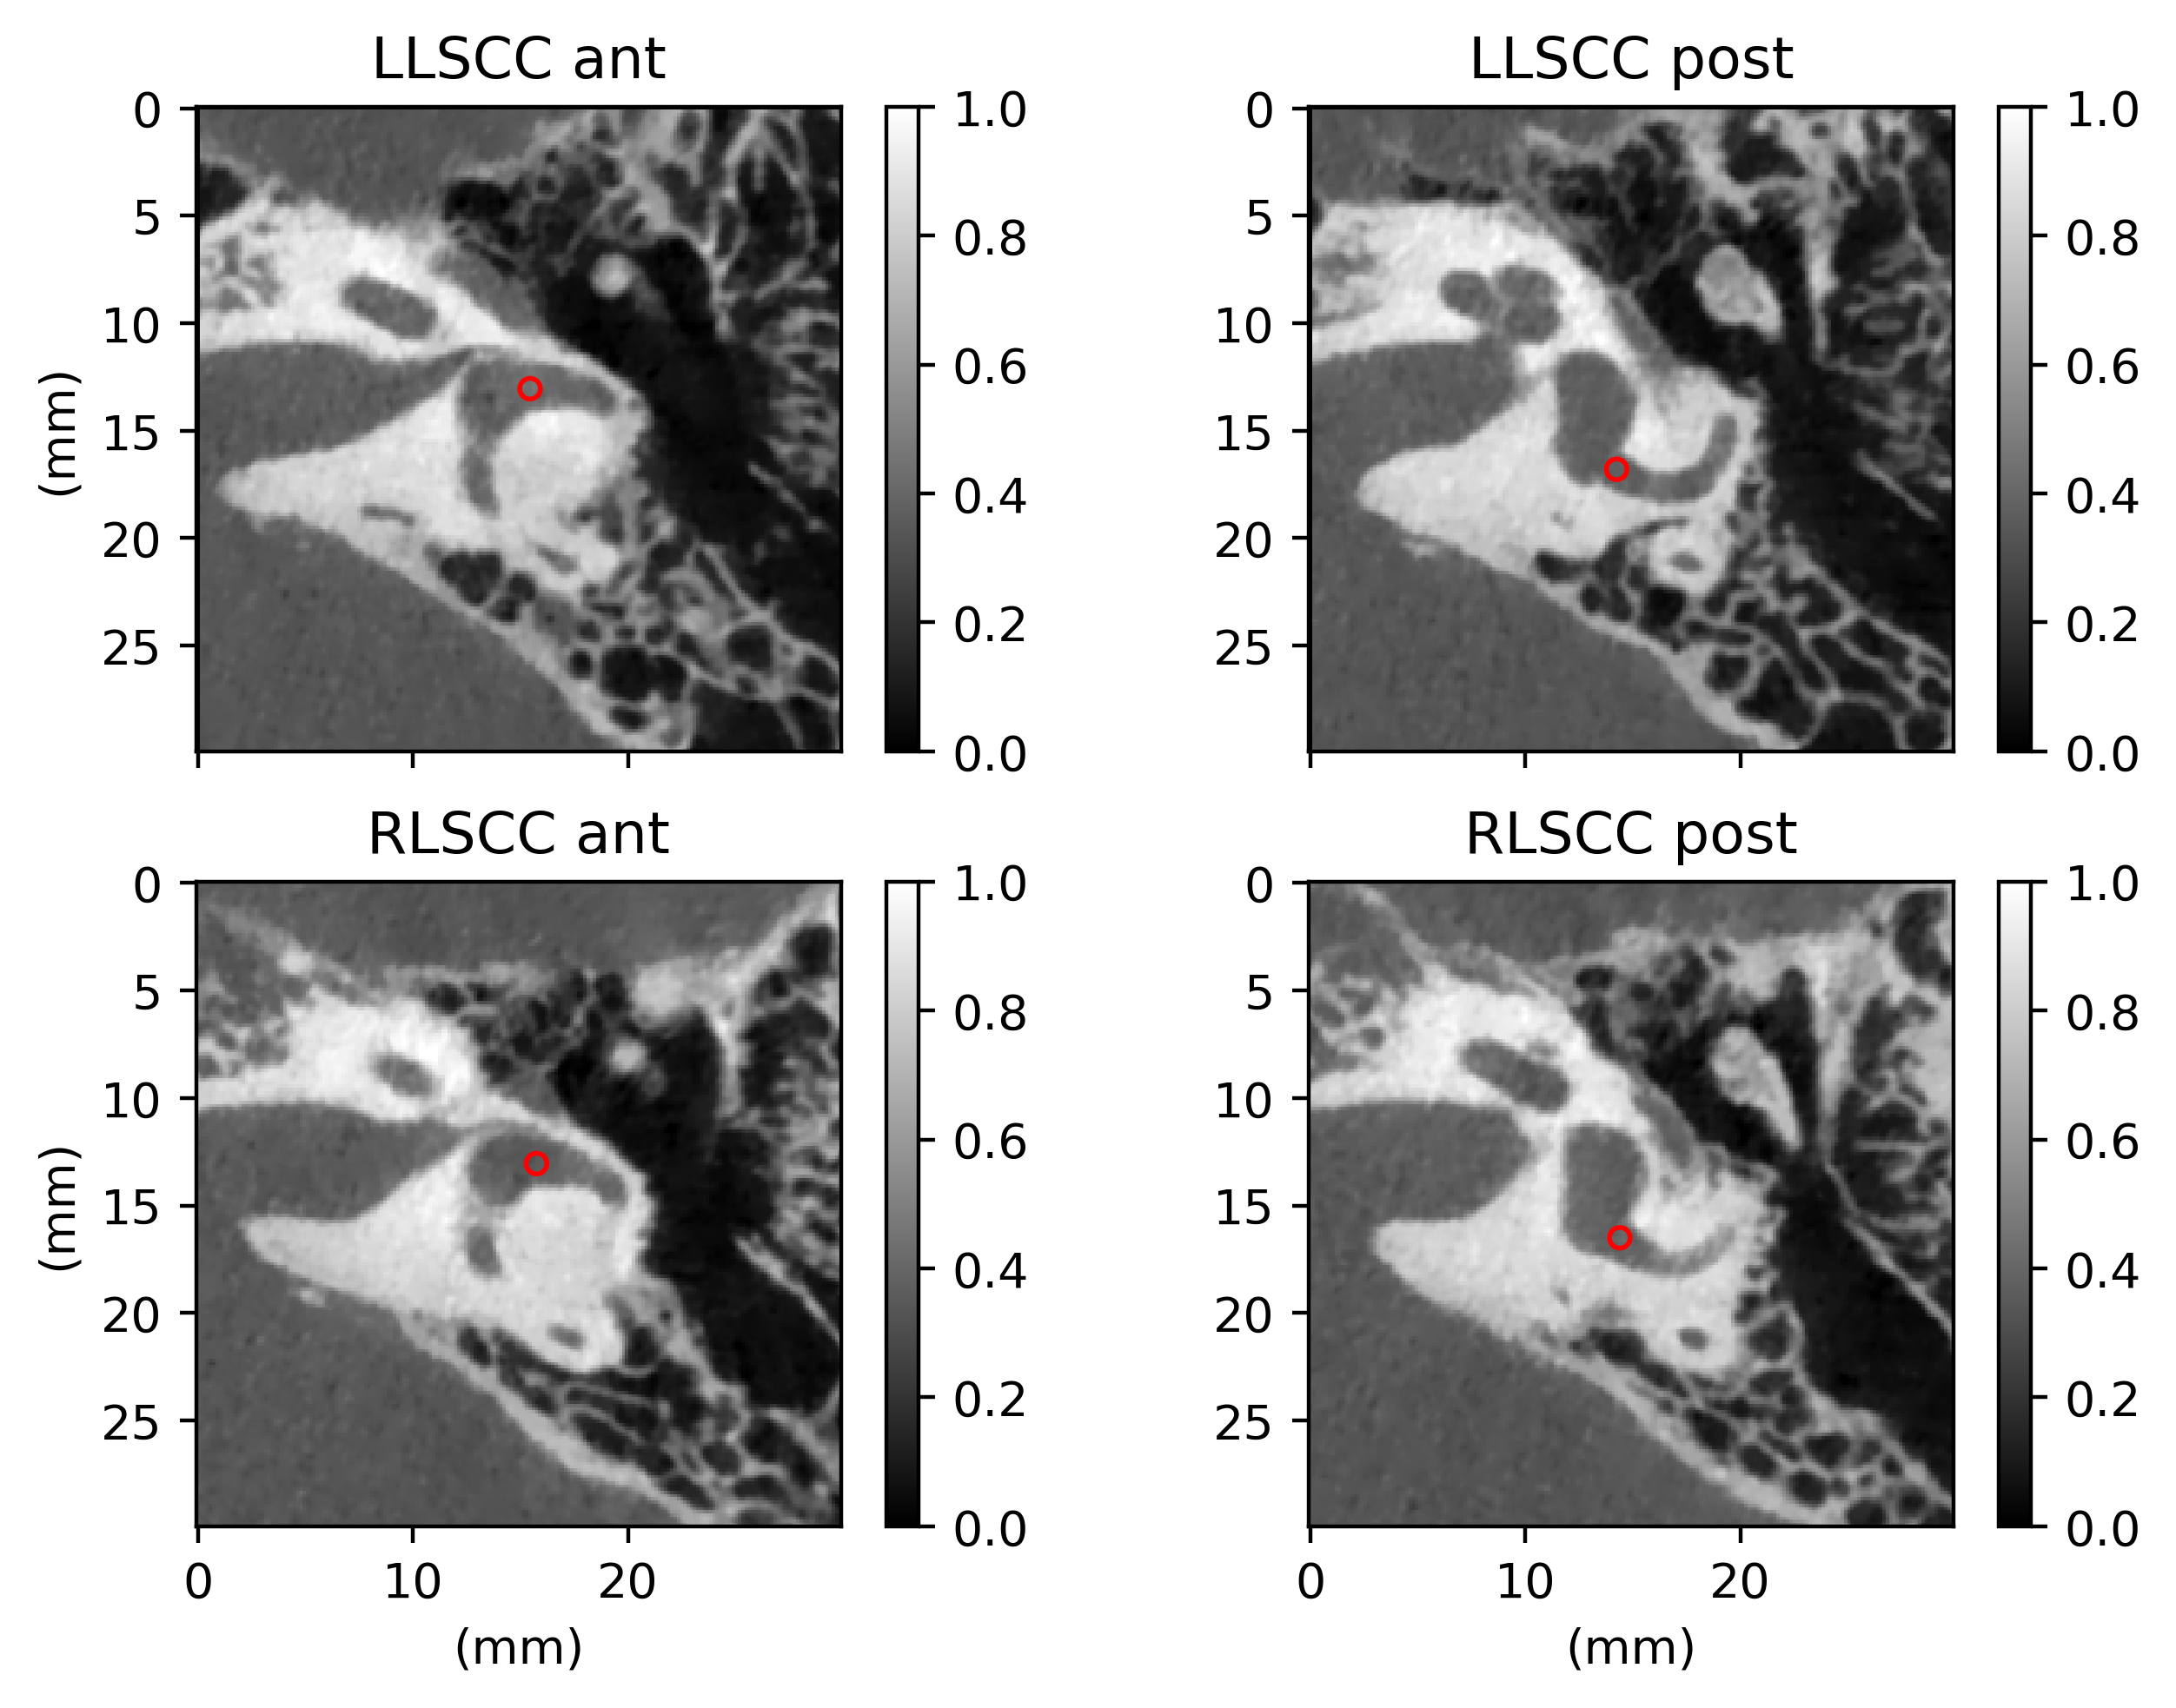

In [157]:
Visualization.show_two_landmarks(v_left_shift, p_left_shift, pat_volume_right, pat_point_right, [0.15, 0.15, 0.15])

In [43]:
[x_angle, y_angle, z_angle] = mean_angle - JM_angle
z_angle = - z_angle
x_angle_r = x_angle * math.pi / 180
y_angle_r = y_angle * math.pi / 180
z_angle_r = z_angle * math.pi / 180

In [27]:
# max rotation angle: 15 Degrees; change to Radian
max_rot_angle = 15
# random rotation angle: -max to +max
rand_angle = 2 * np.random.rand() * max_rot_angle - max_rot_angle
rand_angle_r = rand_angle * math.pi / 180

In [63]:
# v_left_15 = ndimage.rotate(v_left, rand_angle, axes=(0, 1), reshape=False)
# v_left_15 = ndimage.rotate(v_left_15, rand_angle, axes=(0, 2), reshape=False)
# v_left_15 = ndimage.rotate(v_left_15, rand_angle, axes=(1, 2), reshape=False)

v_left_15 = ndimage.rotate(v_left, x_angle, axes=(0, 1), reshape=False)
# v_left_15 = ndimage.rotate(v_left_15, y_angle, axes=(0, 2), reshape=False)
# v_left_15 = ndimage.rotate(v_left_15, z_angle, axes=(1, 2), reshape=False)

In [64]:
import numpy as np
import math

def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation about
    the given axis by theta radians (Euler-Rodrigues formula).
    """
    axis = np.asarray(axis)
    axis = axis / math.sqrt(np.dot(axis, axis))
    a = math.cos(theta / 2.0)
    b, c, d = -axis * math.sin(theta / 2.0)
    aa, bb, cc, dd = a * a, b * b, c * c, d * d
    bc, ad, ac, ab, bd, cd = b * c, a * d, a * c, a * b, b * d, c * d
    return np.array([[aa + bb - cc - dd, 2 * (bc + ad), 2 * (bd - ac)],
                     [2 * (bc - ad), aa + cc - bb - dd, 2 * (cd + ab)],
                     [2 * (bd + ac), 2 * (cd - ab), aa + dd - bb - cc]])

org_centre = np.asarray([200, 200, 160]) / 2.
rot_centre = np.asarray(v_left_15.shape) / 2.

v = p_left - org_centre

axis_0 = np.asarray([100, 100, 70]) - org_centre
p_new = np.dot(rotation_matrix(axis_0, x_angle_r), v.T)

# axis_1 = np.asarray([110, 100, 80]) - org_centre
# p_new = np.dot(rotation_matrix(axis_1, y_angle_r), p_new)

# axis_2 = np.asarray([100, 90, 80]) - org_centre
# p_new = np.dot(rotation_matrix(axis_2, z_angle_r), p_new)


p_new = p_new.T + rot_centre
print(p_new)
print(cal_angles_one(p_new))

[[104.596064    85.68650302  86.        ]
 [ 93.70495558 112.85972067  73.        ]]
70.12
148.03
66.06
[70.12, 148.03, 66.06]


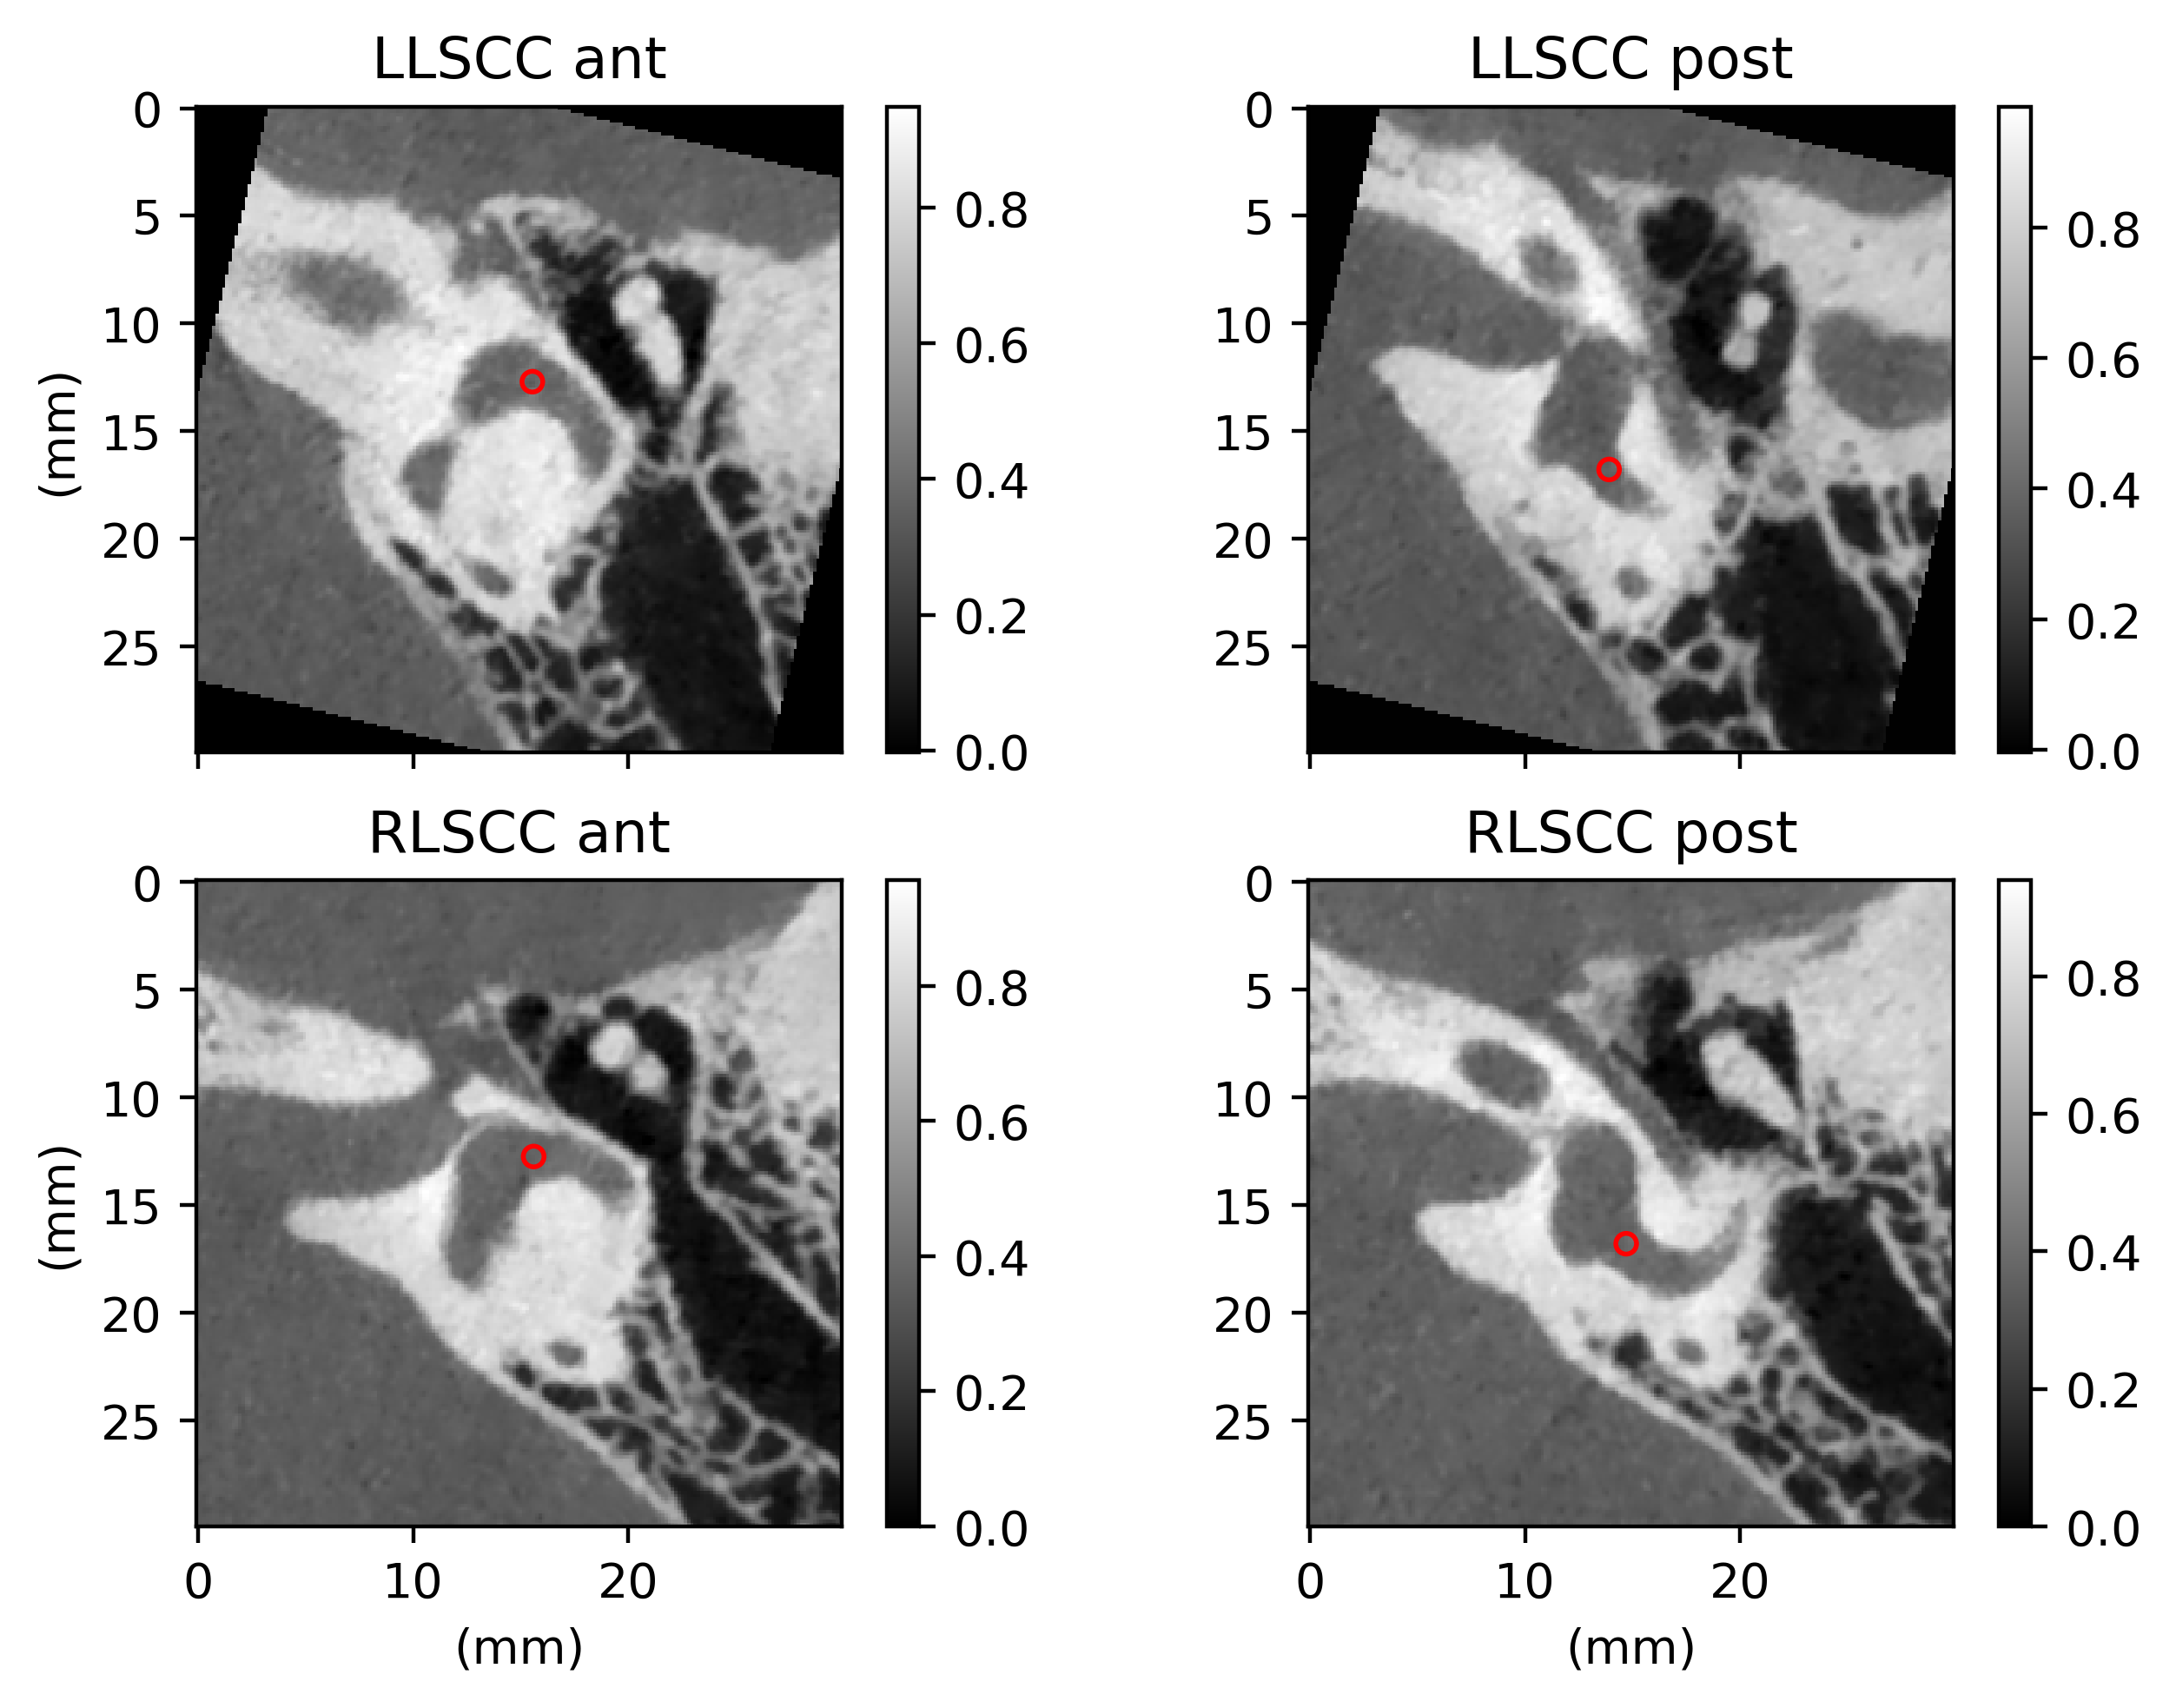

In [65]:
Visualization.show_two_landmarks(v_left_15, p_new, pat_volume_right, pat_point_right, [0.15, 0.15, 0.15])

In [203]:
cal_angles(pat_point_left, p_new)

72.87
156.96
75.07
72.87
162.86
89.39


## Check the relations between the max err and the angles

In [2]:
import numpy as np

base_dir = "/Users/achs/PhD/code/CT-MRI_LandmarkDetection/Spartan/trained_models"

Y_test_gt = np.load(f"{base_dir}/cropped_dataset/straight_model/one_landmark/100x100x100/no_trans/y_test_gt.npy")
Y_test_pr = np.load(f"{base_dir}/cropped_dataset/straight_model/one_landmark/100x100x100/no_trans/bestVal_straight_model_cropped_100x100x100_y_test.npy")

In [3]:
X_test = np.load(f"{base_dir}/cropped_dataset/straight_model/one_landmark/100x100x100/no_trans/x_test.npy")

In [4]:
err_diff = Y_test_pr - Y_test_gt

In [5]:
err_diff_p2 = np.power(err_diff, 2)
sum_square_err_diff = np.sum(err_diff_p2, axis= (1,2) )
err_dis = np.power(sum_square_err_diff, 1/2) * 0.15
min_err_idx = np.argmin(err_dis, axis=0)
max_err_idx = np.argmax(err_dis, axis=0)
print(f"Min[{min_err_idx}]: {err_dis[min_err_idx]}")
print(f"Max[{max_err_idx}]: {err_dis[max_err_idx]}")
print(f"Mean: {np.mean(err_dis)}")

Min[469]: 0.0709972232580185
Max[307]: 0.6241366267204285
Mean: 0.3466654121875763


In [6]:
err_max2min_ids = sorted(range(len(err_dis)), key=lambda k: err_dis[k], reverse=True)

In [7]:
print(err_max2min_ids[0:100])

[307, 258, 346, 206, 236, 218, 244, 302, 326, 324, 386, 374, 362, 314, 328, 260, 272, 382, 312, 348, 320, 336, 220, 282, 116, 340, 90, 14, 45, 15, 78, 57, 61, 111, 66, 145, 85, 53, 155, 71, 157, 95, 33, 148, 173, 68, 106, 142, 84, 224, 194, 100, 338, 35, 179, 316, 59, 12, 40, 13, 19, 135, 138, 101, 165, 5, 161, 396, 109, 55, 131, 191, 129, 79, 232, 67, 141, 130, 318, 189, 177, 163, 77, 183, 175, 178, 70, 93, 279, 30, 153, 170, 3, 65, 39, 37, 47, 1, 49, 310]


In [66]:
import Functions.MyDataset as MyDataset

import importlib
importlib.reload(MyDataset)

ck_id = 310

pt_name, pt_aug_id = MyDataset.get_pat_from_test_idx(ck_id, split=True, aug_num=100)

In [67]:
ck_volume = X_test[ck_id, :, :, :, 0]
ck_y_gt = Y_test_gt[ck_id, :, :]
ck_y_pr = Y_test_pr[ck_id, :, :]

print(err_dis[ck_id])
print(ck_y_gt)
print(ck_y_pr)

0.57546467
[[52.914505 37.424965 55.419796]]
[[56.30377  37.40826  57.217243]]


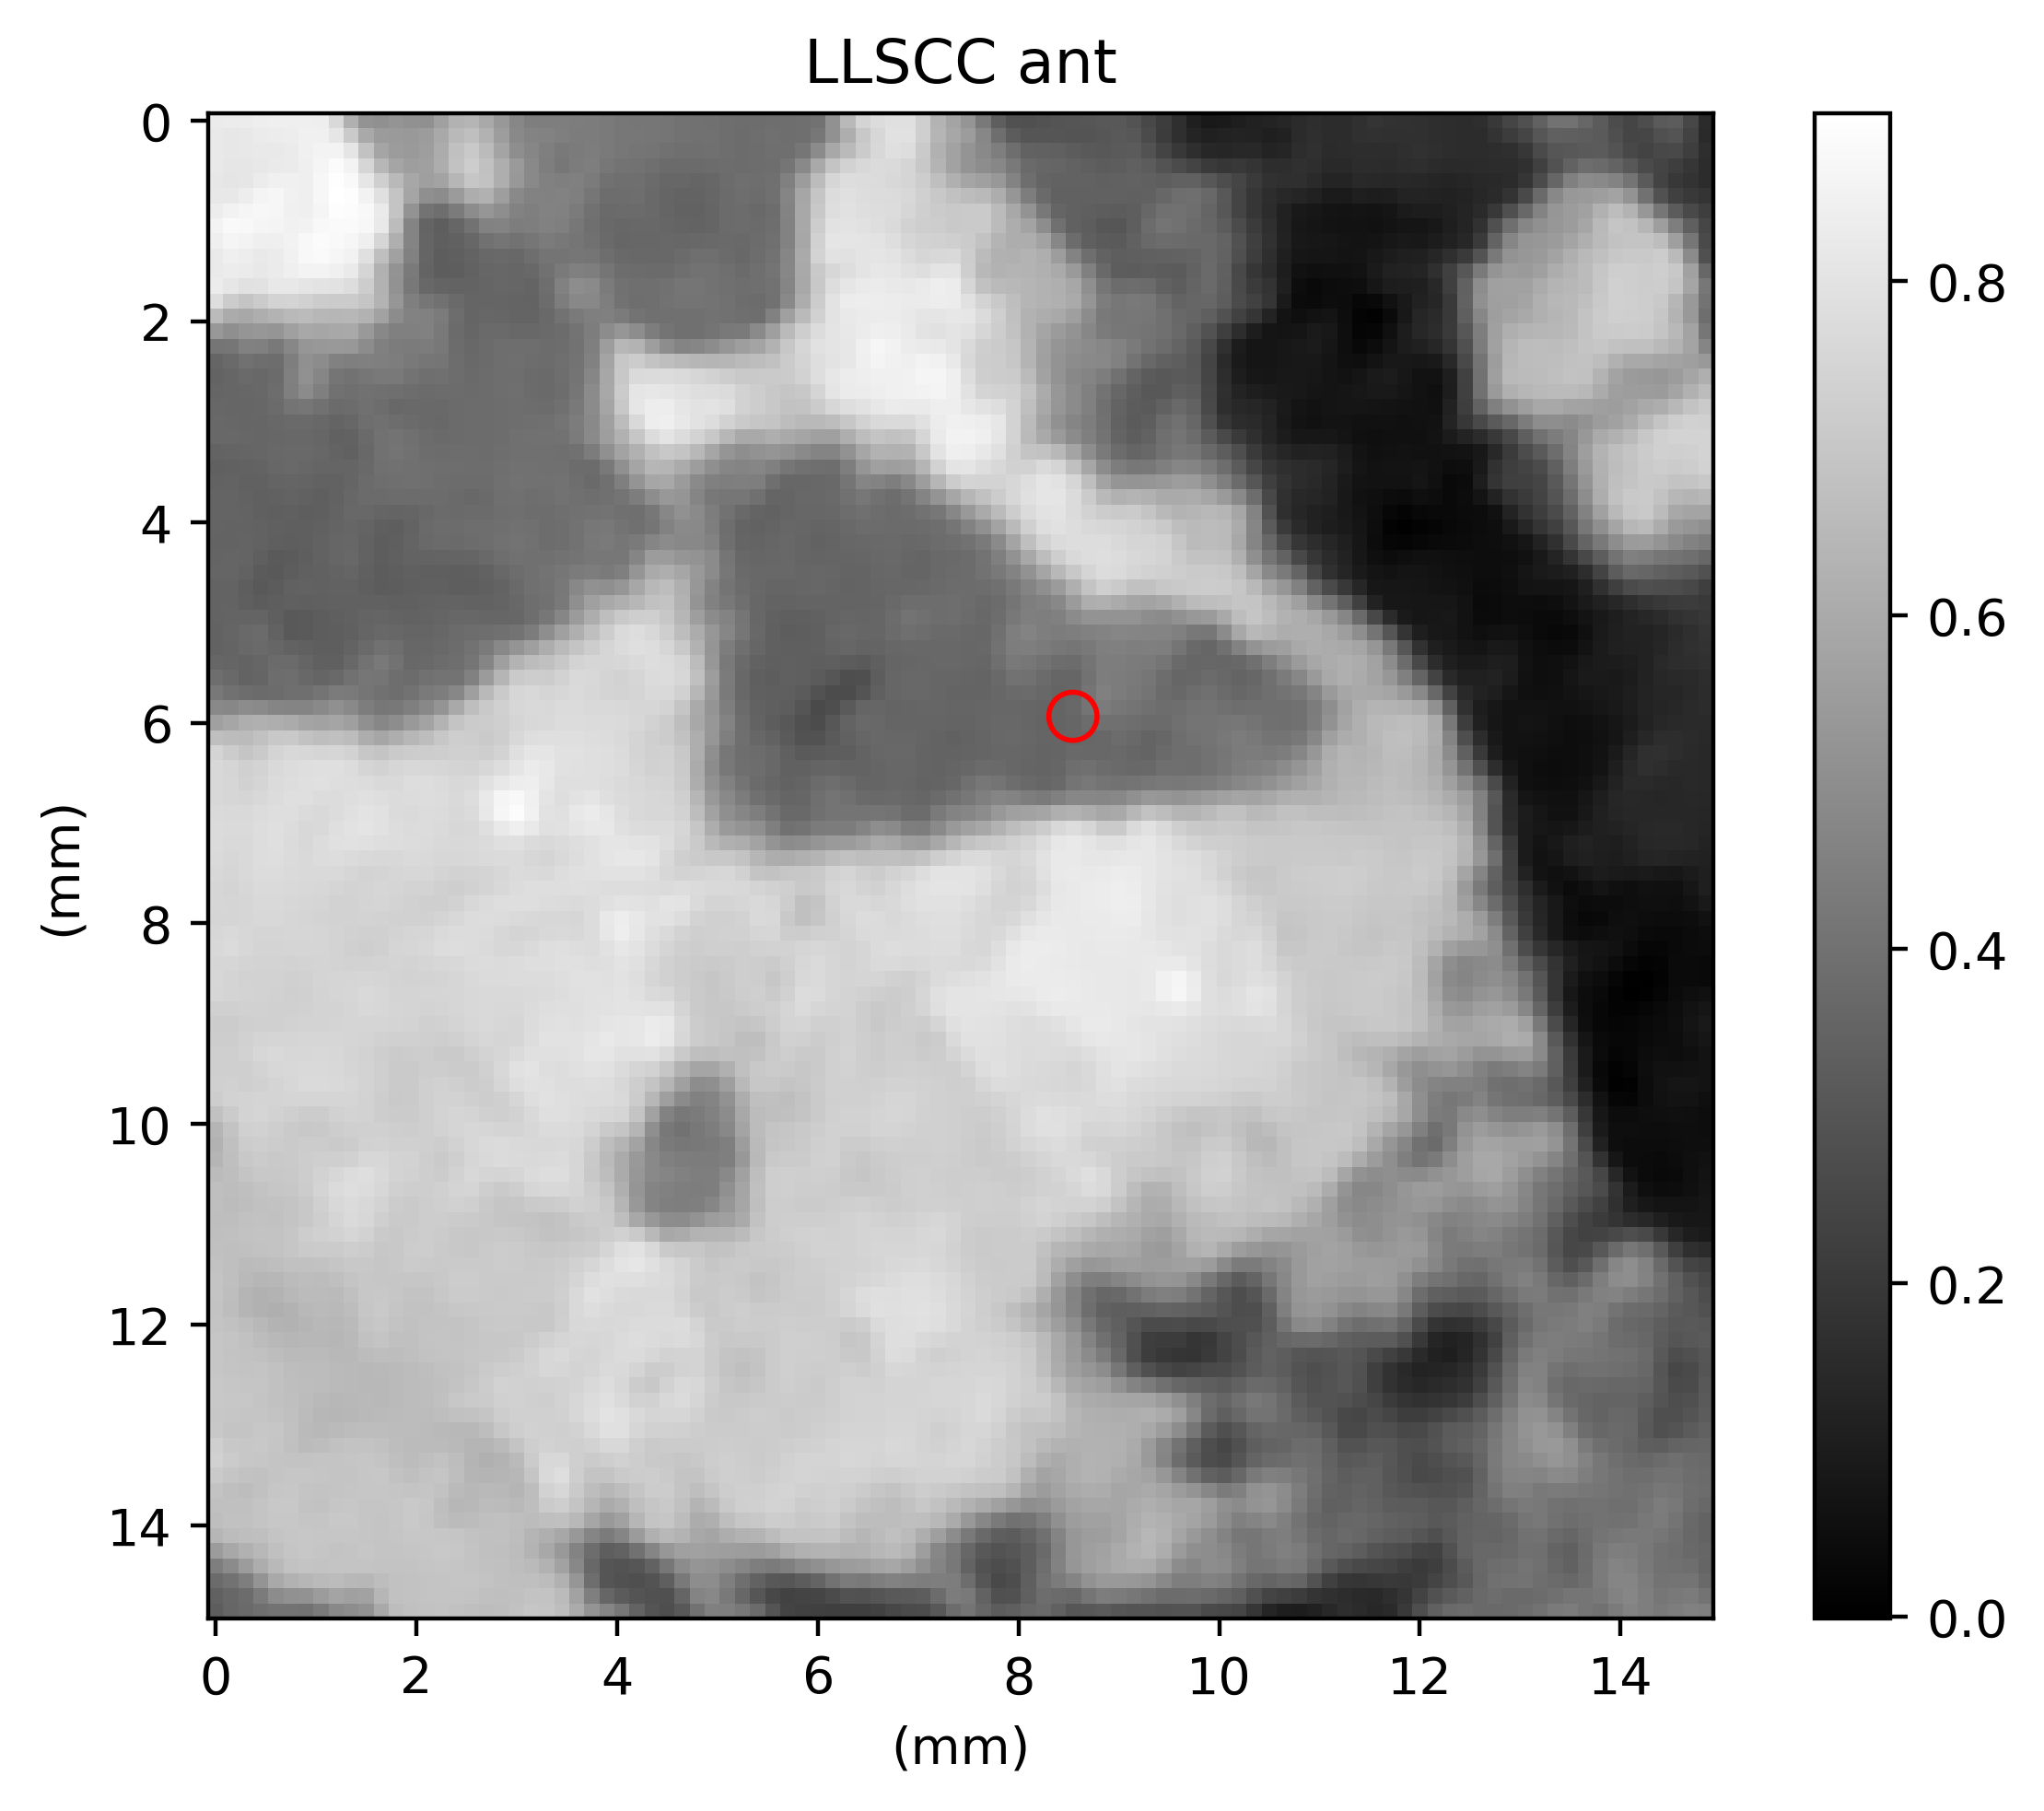

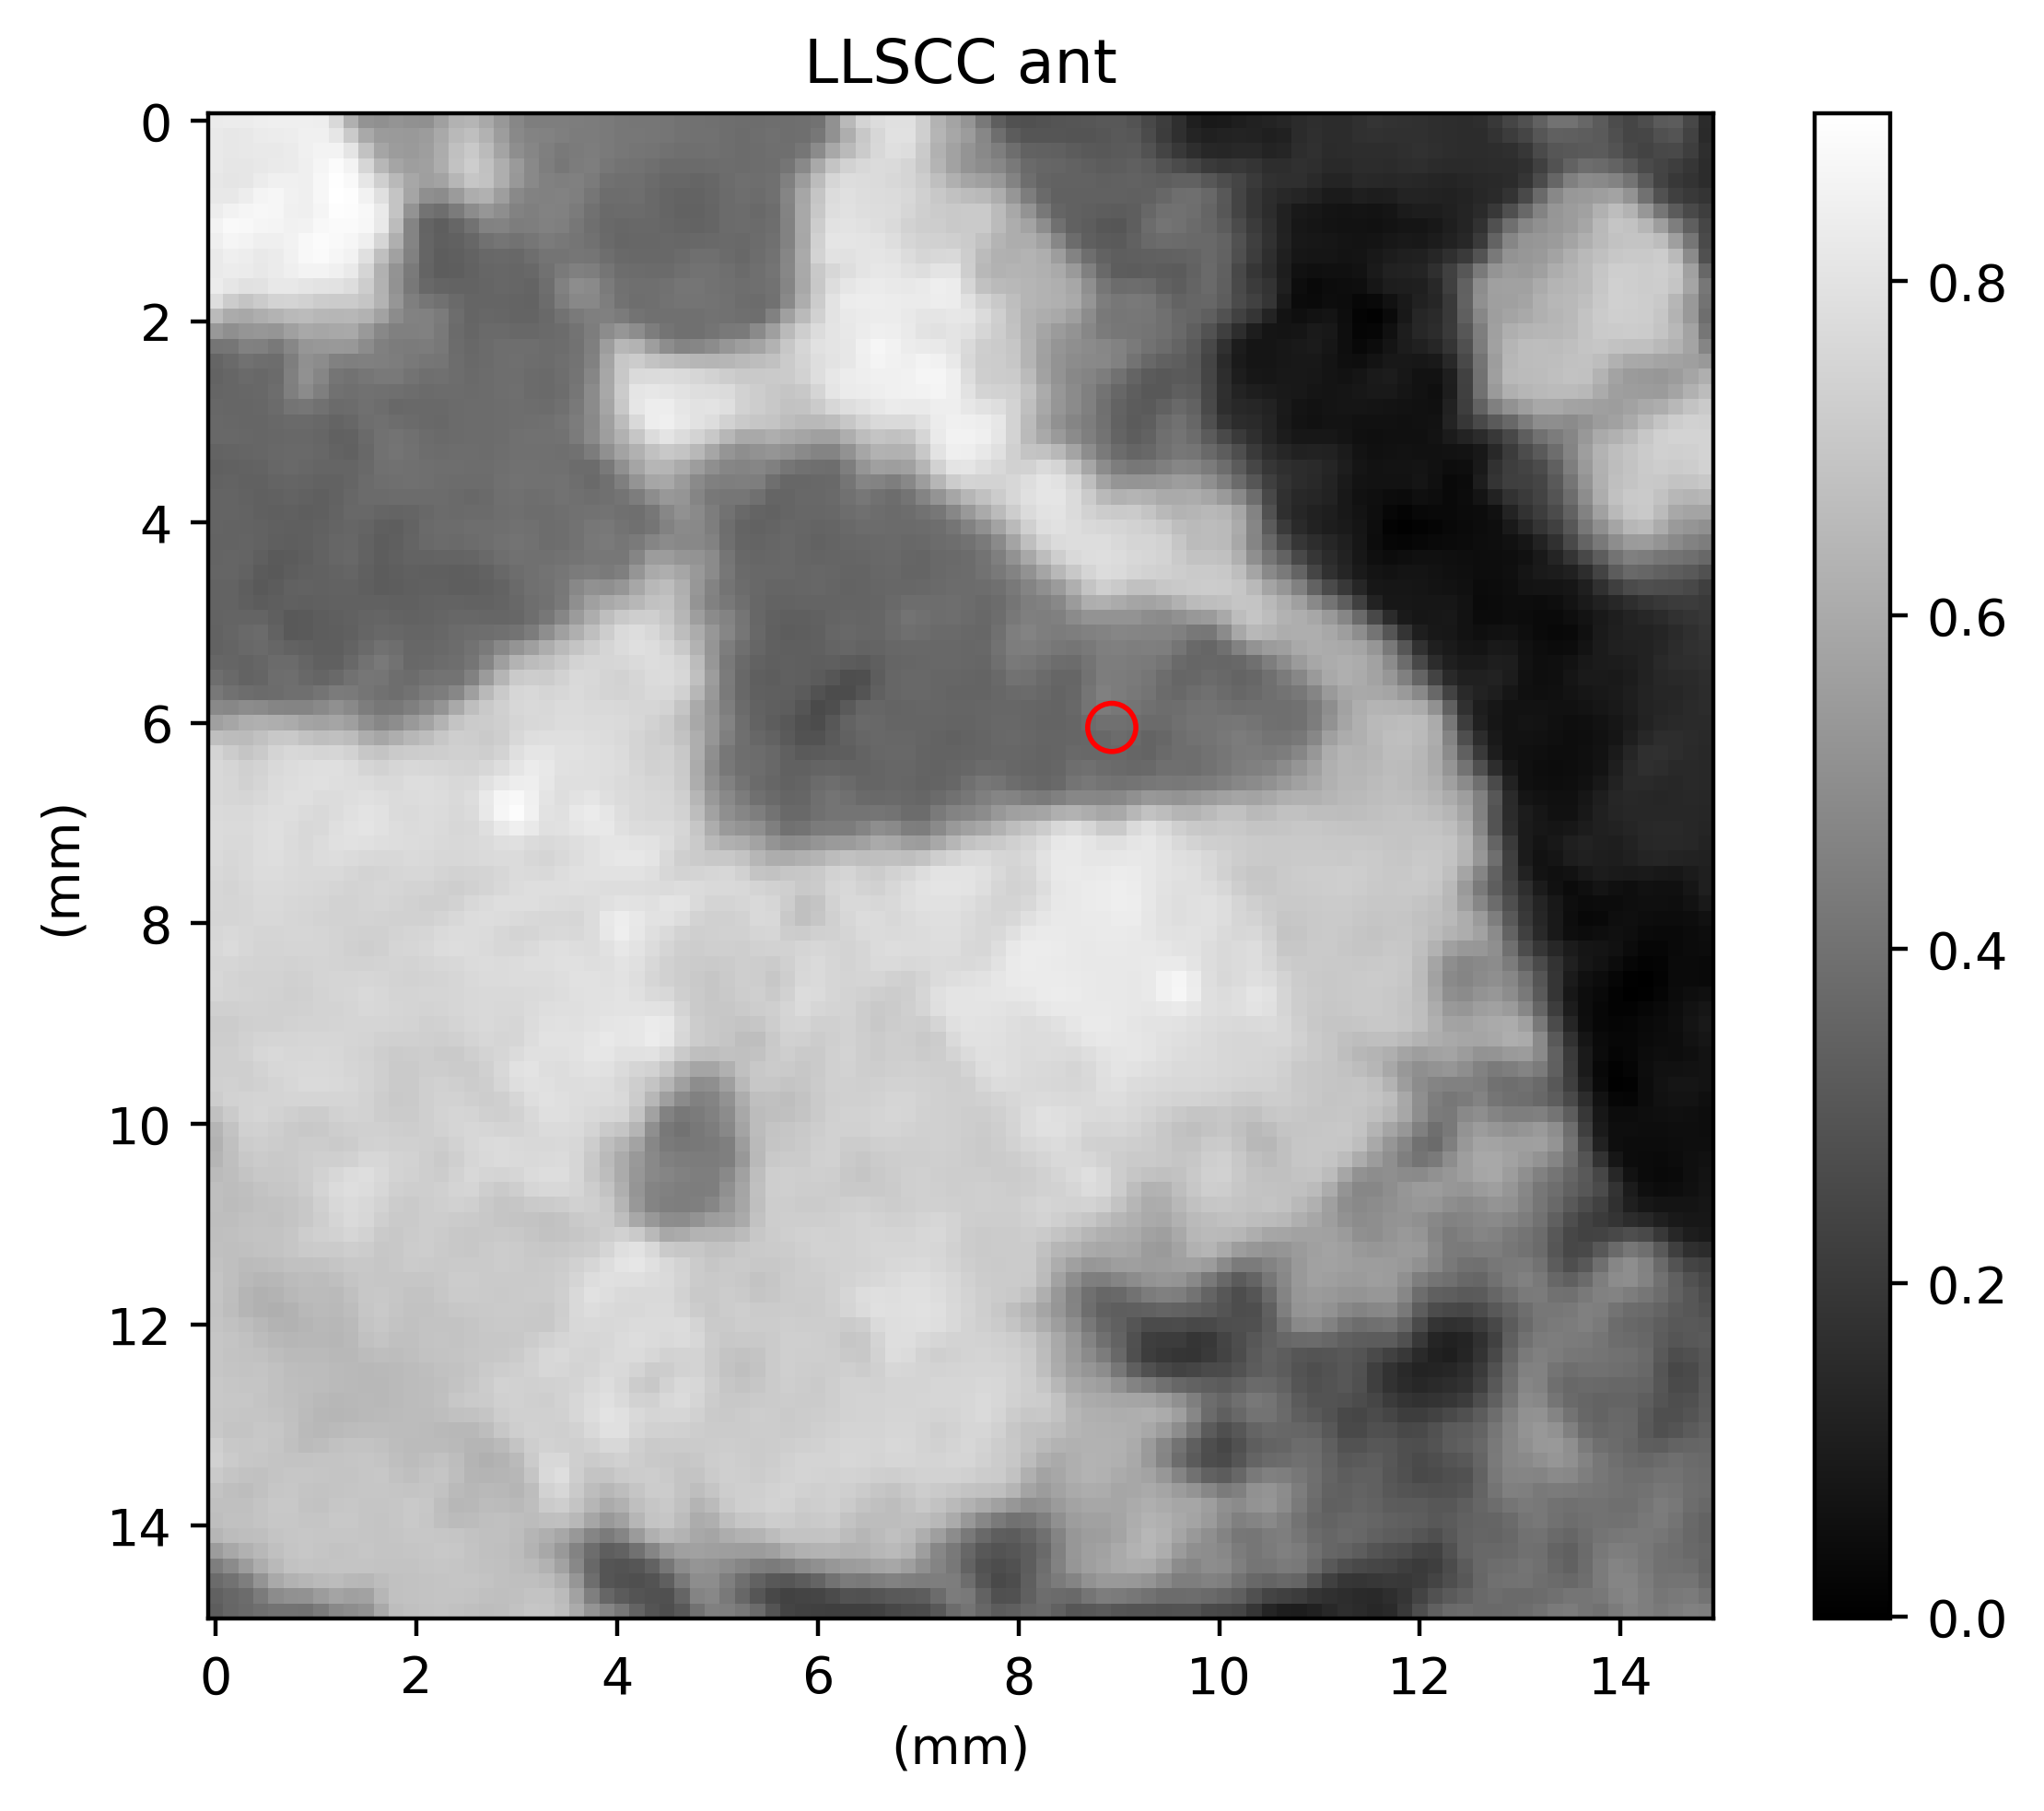

In [55]:
import Functions.Visualization as Visualization

import importlib
importlib.reload(Visualization)

px_d = [0.15, 0.15, 0.15]

Visualization.show_one_landmark_half_volume(ck_volume, ck_y_gt, px_d)

Visualization.show_one_landmark_half_volume(ck_volume, ck_y_pr, px_d)

## check the Augmentation results

In [31]:
import numpy as np
import h5py

data_file_path = "F:/Data/augmentation_exp/original_divided_augmentation/JM_aug_2.mat"

data_file = h5py.File(data_file_path, 'r')

left_vol = np.array(data_file.get('augLeftVol')).T
left_pts = np.array(data_file.get('augLeftPts')).T

right_vol = np.array(data_file.get('augRightVol')).T
right_pts = np.array(data_file.get('augRightPts')).T

data_file.close()

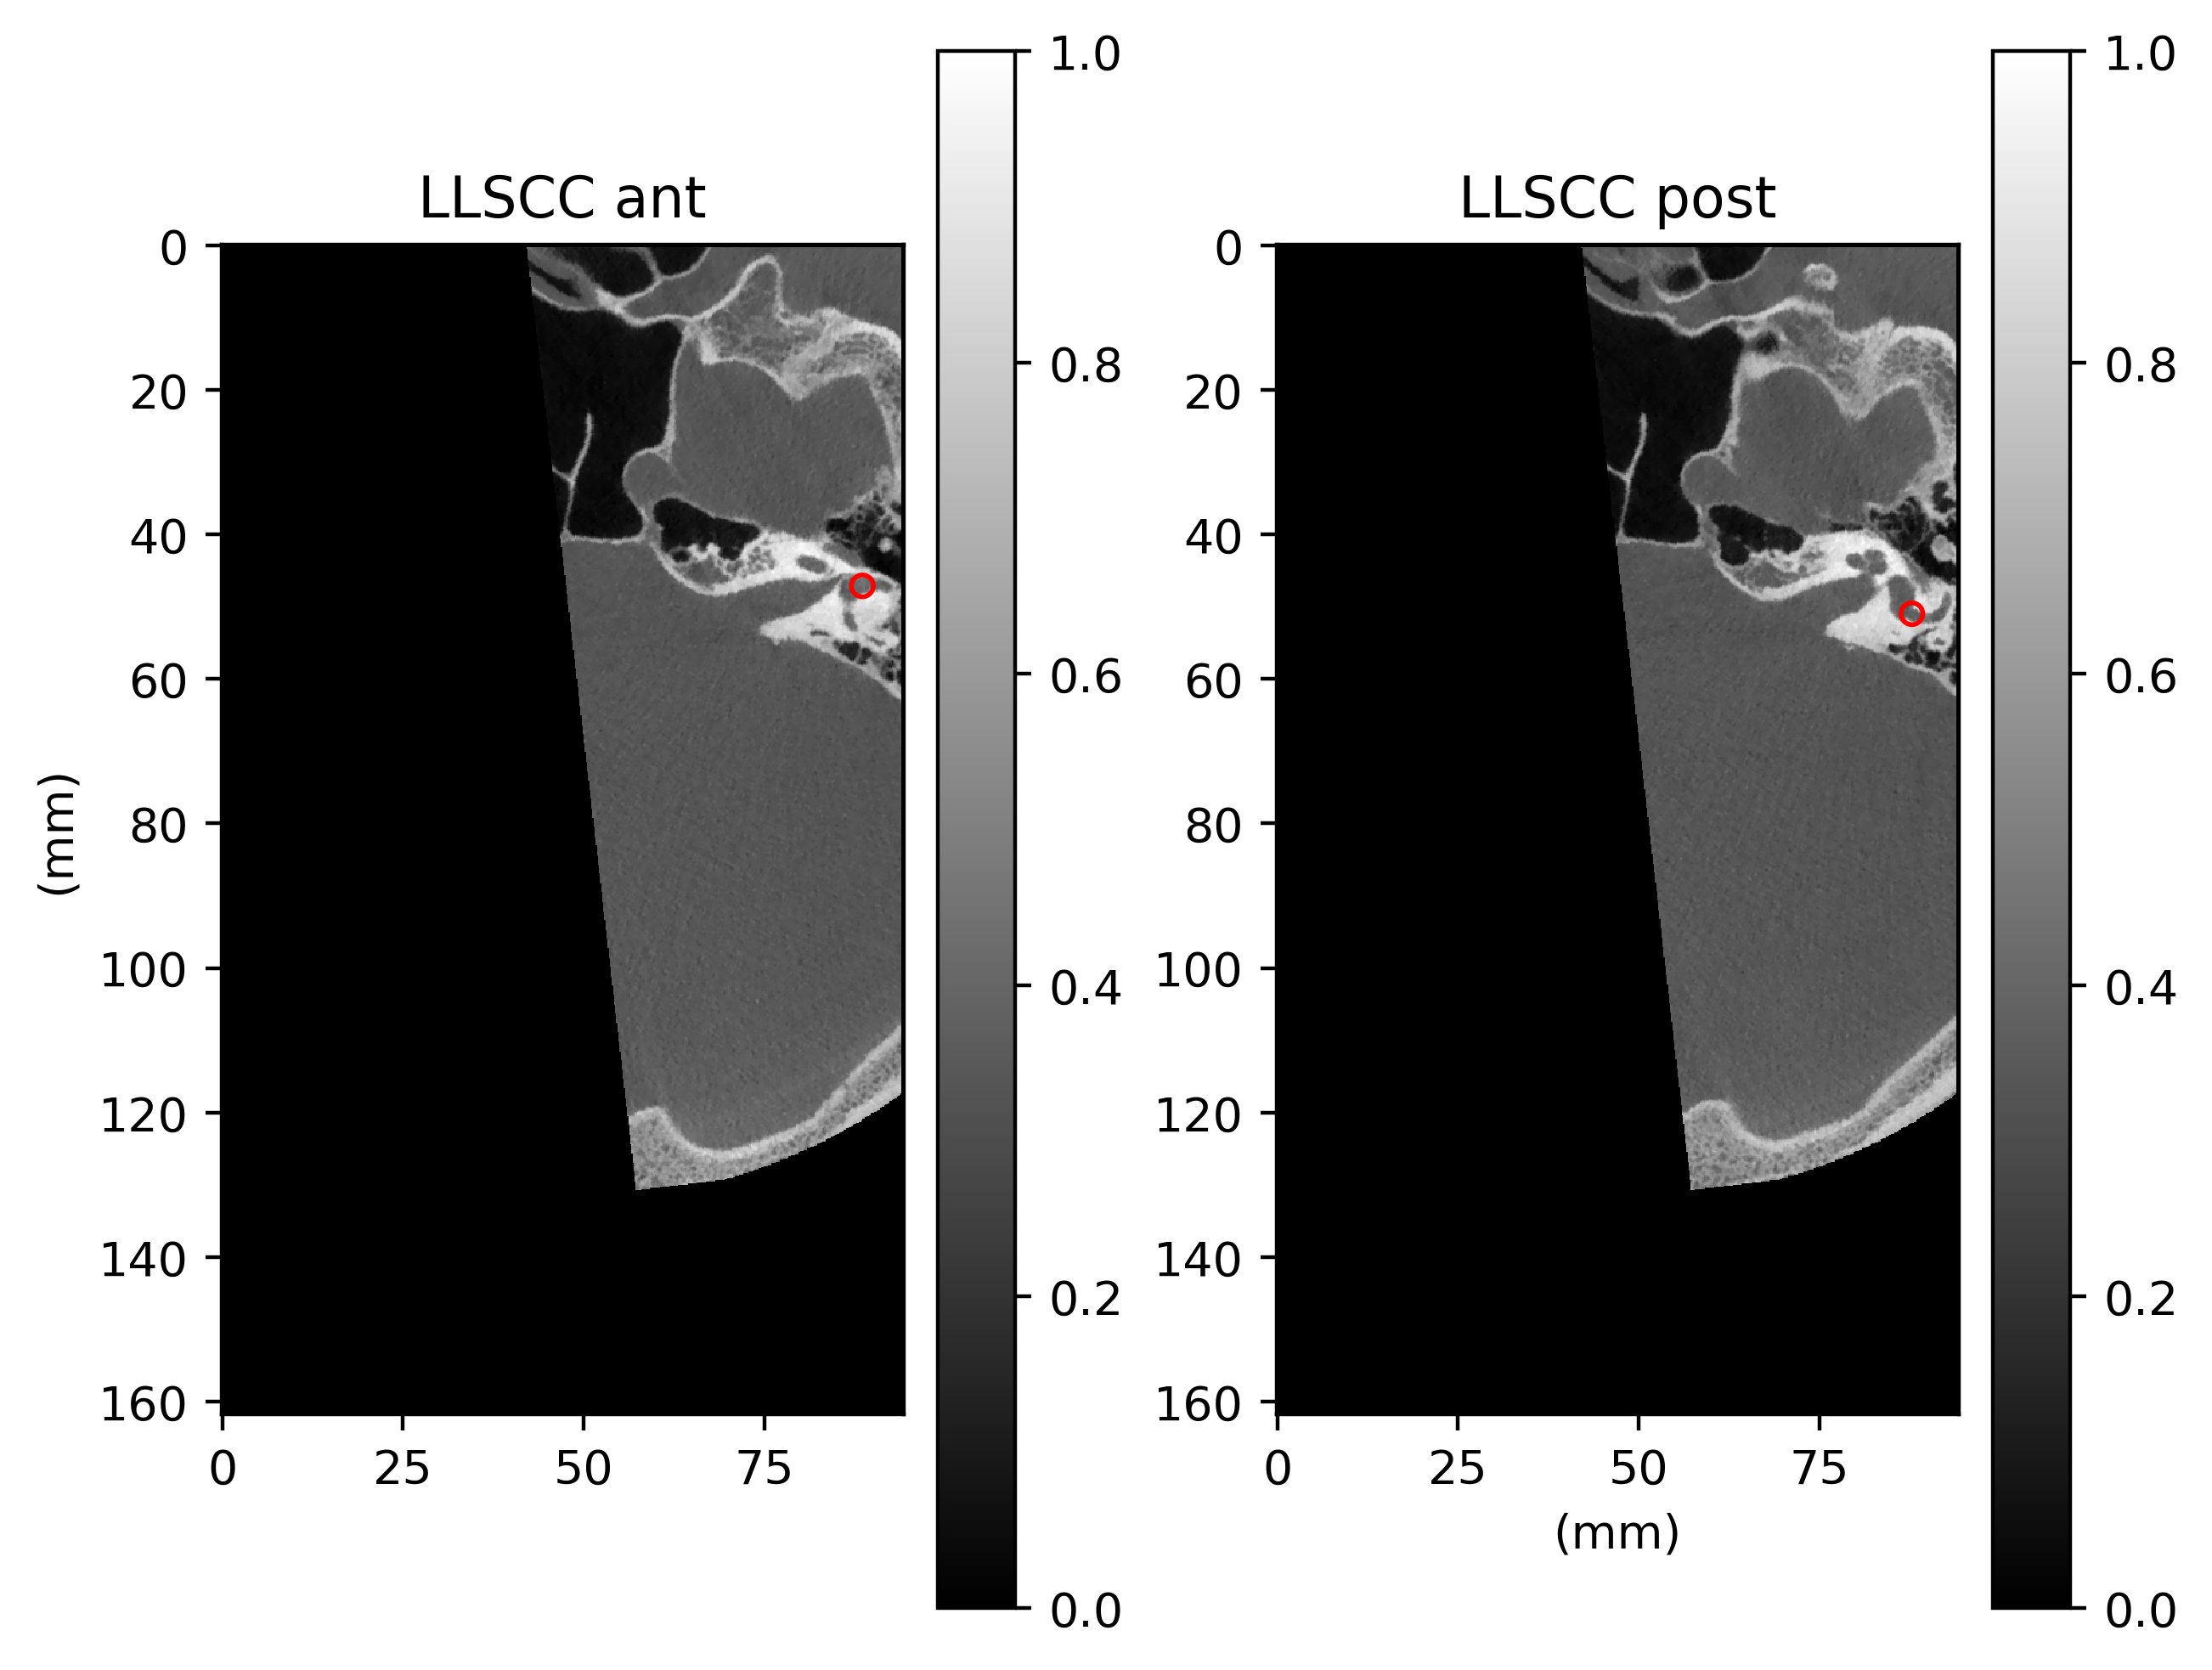

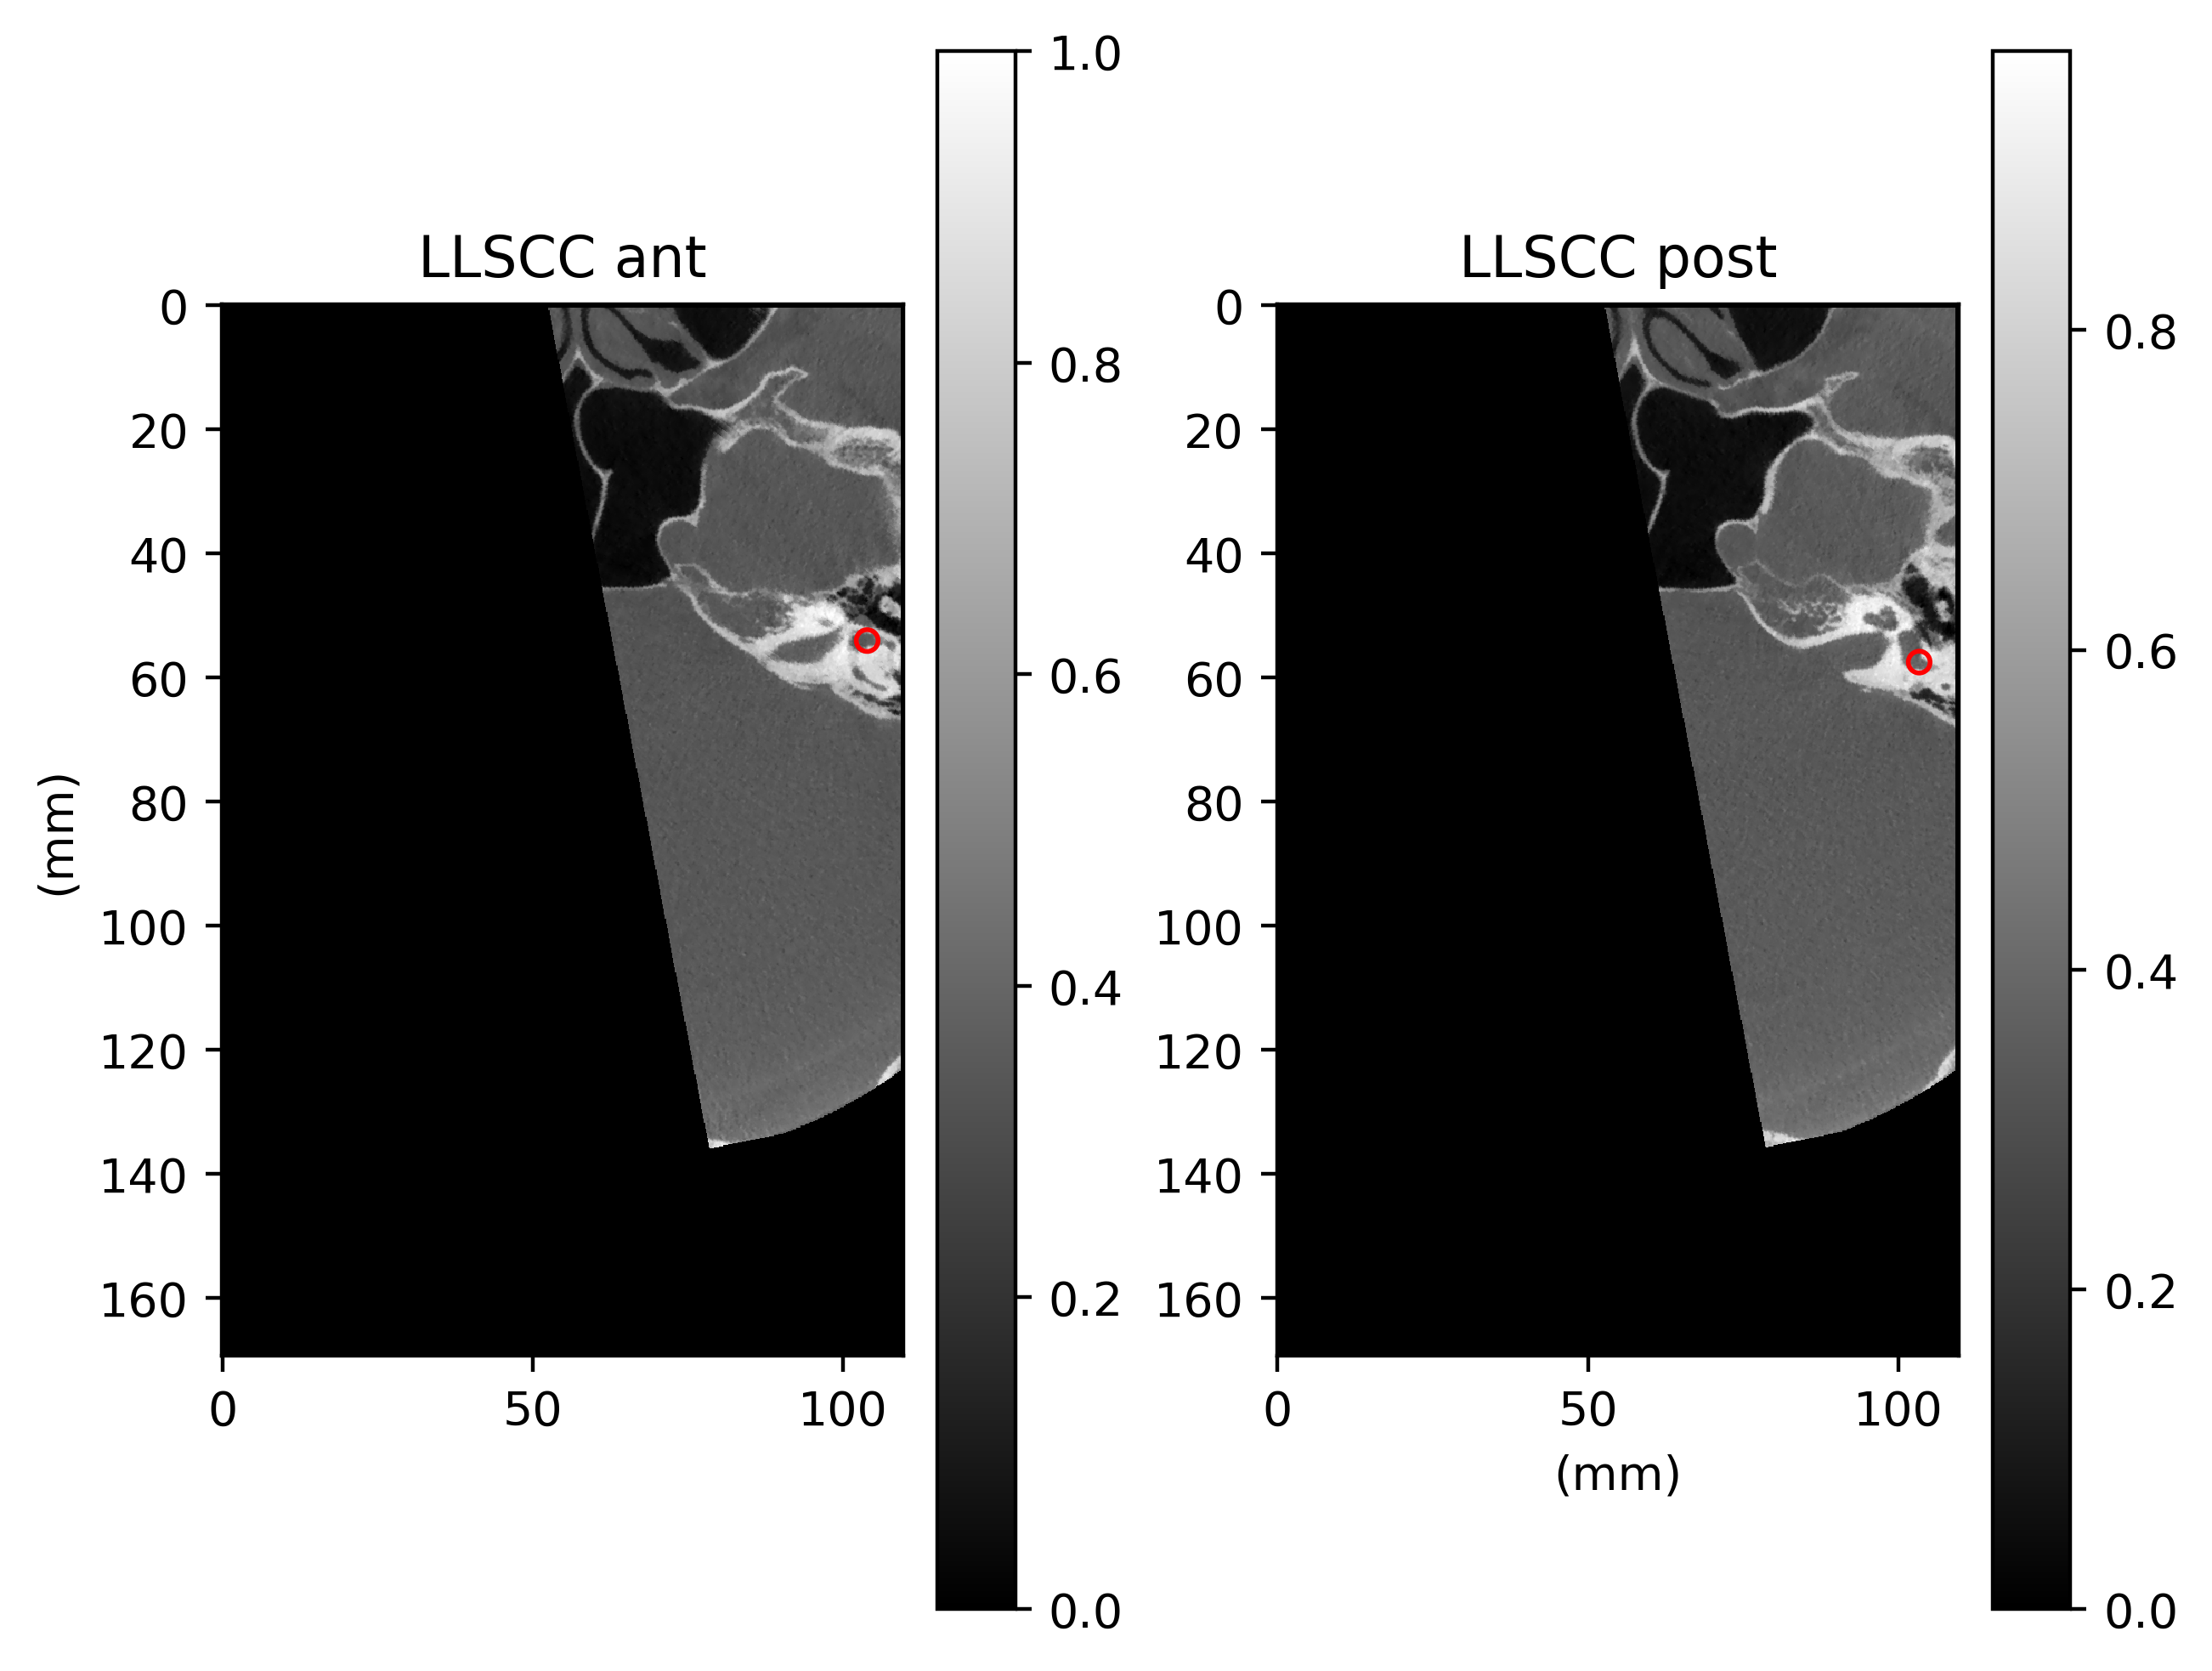

In [32]:
import Functions.Visualization as Visualization

import importlib
importlib.reload(Visualization)

Visualization.show_two_landmarks_half_volume(left_vol, left_pts, [0.15, 0.15, 0.15])
Visualization.show_two_landmarks_half_volume(right_vol, right_pts, [0.15, 0.15, 0.15])

check augmentation results from python's patch aug code

In [2]:
import numpy as np

base_dir = "/Volumes/my_HDD/augmentation_exp/patch_augmentation_python"
volume_path = f"{base_dir}/AH_volume_patch_aug_1.npy"
points_path = f"{base_dir}/AH_points_aug_1.npy"

aug_volumes = np.load(volume_path)
aug_points = np.load(points_path)

print(aug_volumes.shape)
print(aug_points.shape)

(100, 200, 200, 160, 1)
(100, 2, 3)


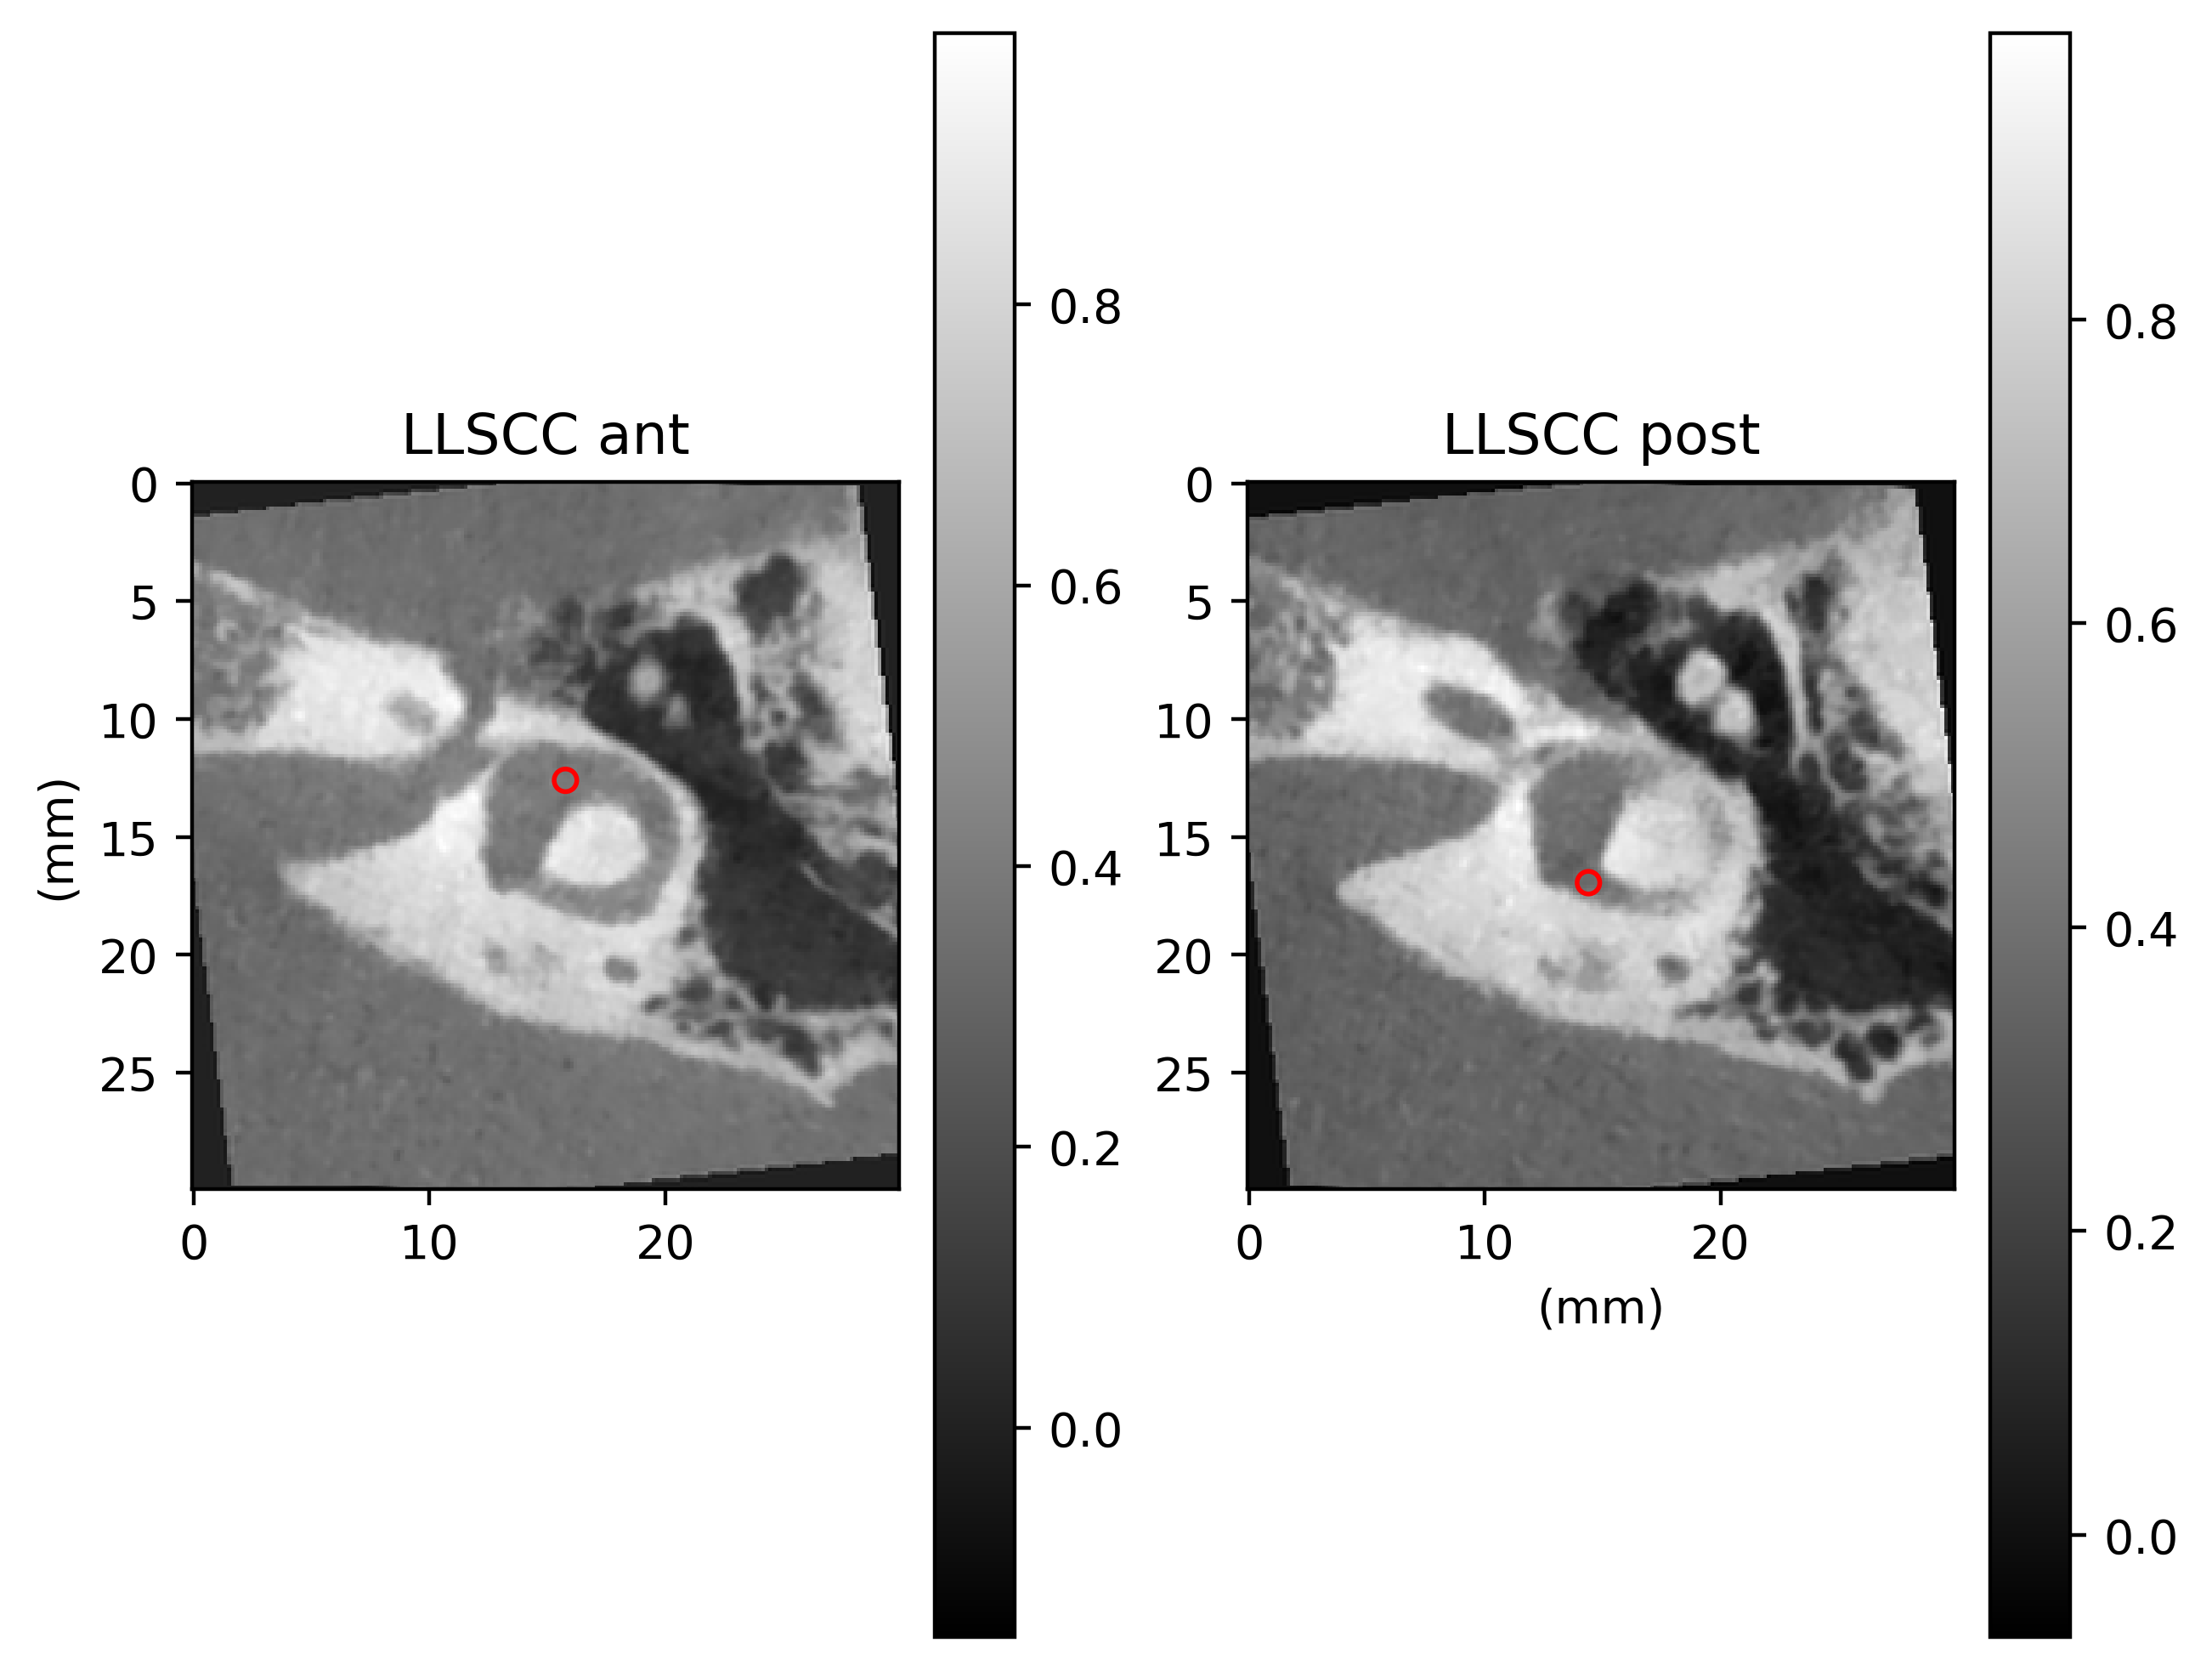

In [17]:
import Functions.Visualization as Visualization

ck_aug_id = 99

ck_aug_volume = aug_volumes[ck_aug_id, :, :, :, 0]
ck_aug_points = aug_points[ck_aug_id]

Visualization.show_two_landmarks_half_volume(ck_aug_volume, ck_aug_points, [0.15, 0.15, 0.15])